# Bloque de instalaciones

In [ ]:
#Visualizar la información de la GPU si existe
# gpu_info = !nvidia-smi
# gpu_info = '\n'.join(gpu_info)
# if gpu_info.find('failed') >= 0:
#   print('Not connected to a GPU')
# else:
#   print(gpu_info)
# #Visualizar la información de la TPU si existe
# import tensorflow as tf
# print("Tensorflow version " + tf.__version__)
#
# try:
#   tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
#   print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
# except ValueError:
#   raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')
#
# tf.config.experimental_connect_to_cluster(tpu)
# tf.tpu.experimental.initialize_tpu_system(tpu)
# tpu_strategy = tf.distribute.TPUStrategy(tpu)

In [ ]:
## Por si fuese necesario instalar versiones antiguas.
!pip uninstall -y numba
#!pip install 'numpy==1.23.0'
!pip install 'numba==0.60.0'
!uv pip install -q --system numba-cuda==0.4.0

# IMPORTANTE: Hay que rearrancar el entorno después de esta celda
!pip install tsfresh

Found existing installation: numba 0.60.0
Uninstalling numba-0.60.0:
  Successfully uninstalled numba-0.60.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 33.9 MB/s eta 0:00:00


In [ ]:
!pip install lightkurve #Instalación de Lightkurve

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 256.9/256.9 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 53.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.6/199.6 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.2/85.2 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 37.0 MB/s eta 0:00:00
  Created wheel for fbpca: filename=fbpca-1.0-py3-none-any.whl size=11373 sha256=d0a66aa6bc92fdf637412757b764253983b07cb4944cacb76742433537f7196b
  Stored in directory: /root/.cache/pip/wheels/04/15/cd/2f622795b09e83471a3be5d2581cd9cf96a6ec7aa78e8deffe
  Created wheel for memoization:

In [ ]:
!pip install PyWavelets #Instalación de PyWavelets

In [ ]:
#Conexión a Google Drive
from google.colab import drive
mount_point='/content/drive'
drive.mount(mount_point)
base_dir='{}/MyDrive/TFM'.format(mount_point)

Mounted at /content/drive


# Bloque de Importaciones

In [ ]:
#Realizamos las importaciones necesarias
import lightkurve as lk
import matplotlib.pyplot as plt # para plotear datos
import pandas as pd
import numpy as np
import pywt
import pywt.data
from matplotlib.pyplot import figure

ModuleNotFoundError: No module named 'lightkurve'

In [ ]:
from numba import config
config.CUDA_ENABLE_PYNVJITLINK = 1

In [ ]:
# Import QUE FALLAN si no se rearranca el entorno después de instalar tsfresh
from tsfresh import extract_features
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh import extract_relevant_features
from tsfresh.feature_extraction.settings import ComprehensiveFCParameters
from tsfresh.feature_extraction import extract_features, MinimalFCParameters, EfficientFCParameters

# Bloque de extracción de curvas de luz

In [ ]:
df_koi = pd.read_csv('/content/drive/MyDrive/TFM/cumulative_2022.08.09_10.37.12.csv'.format(base_dir), skiprows=144)
#Si queremos eliminar los candidatos
df_koi = df_koi[df_koi.koi_disposition != 'CANDIDATE']
#Reseteamos el índice tras eliminar exoplanetas candidatos del dataset
df_koi = df_koi.reset_index(drop=True)
df_koi

rowid     kepid kepoi_name   kepler_name koi_disposition koi_vet_stat  \
0         1  10797460  K00752.01  Kepler-227 b       CONFIRMED         Done   
1         2  10797460  K00752.02  Kepler-227 c       CONFIRMED         Done   
2         4  10848459  K00754.01           NaN  FALSE POSITIVE         Done   
3         5  10854555  K00755.01  Kepler-664 b       CONFIRMED         Done   
4         6  10872983  K00756.01  Kepler-228 d       CONFIRMED         Done   
...     ...       ...        ...           ...             ...          ...   
7503   9558  10205598  K08198.01           NaN  FALSE POSITIVE         Done   
7504   9559  10031643  K07984.01           NaN  FALSE POSITIVE         Done   
7505   9560  10090151  K07985.01           NaN  FALSE POSITIVE         Done   
7506   9562  10147276  K07987.01           NaN  FALSE POSITIVE         Done   
7507   9564  10156110  K07989.01           NaN  FALSE POSITIVE         Done   

     koi_vet_date koi_pdisposition  koi_score  koi_fpflag_nt  ...  \
0      2018-08-16        CANDIDATE      1.000              0  ...   
1      2018-08-16        CANDIDATE      0.969              0  ...   
2      2018-08-16   FALSE POSITIVE      0.000              0  ...   
3      2018-08-16        CANDIDATE      1.000              0  ...   
4      2018-08-16        CANDIDATE      1.000              0  ...   
...           ...              ...        ...            ...  ...   
7503   2018-08-16   FALSE POSITIVE      0.008              1  ...   
7504   2018-08-16   FALSE POSITIVE      0.000              0  ...   
7505   2018-08-16   FALSE POSITIVE      0.000              0  ...   
7506   2018-08-16   FALSE POSITIVE      0.021              0  ...   
7507   2018-08-16   FALSE POSITIVE      0.000              0  ...   

      koi_dicco_mdec  koi_dicco_mdec_err  koi_dicco_msky koi_dicco_msky_err  \
0              0.200               0.160           0.200              0.170   
1              0.000               0.480           0.390              0.360   
2              0.147               0.078           0.289              0.079   
3             -0.090               0.180           0.100              0.140   
4             -0.070               0.110           0.080              0.130   
...              ...                 ...             ...                ...   
7503          -0.990               0.160           2.550              0.140   
7504          -1.200               1.000           1.750              0.820   
7505          -1.757               0.068           2.763              0.074   
7506          -3.650               0.260           5.000              0.220   
7507           3.300               1.100           3.400              1.100   

     koi_dikco_mra  koi_dikco_mra_err  koi_dikco_mdec  koi_dikco_mdec_err  \
0            0.080              0.130           0.310               0.170   
1            0.490              0.340           0.120               0.730   
2           -0.257              0.072           0.099               0.077   
3            0.070              0.180           0.020               0.160   
4           -0.020              0.130          -0.080               0.100   
...            ...                ...             ...                 ...   
7503         2.370              0.140          -0.910               0.160   
7504         1.350              0.600          -1.300               1.000   
7505         2.344              0.072          -1.756               0.068   
7506         3.380              0.160          -3.890               0.260   
7507         0.960              0.670           3.400               1.100   

      koi_dikco_msky  koi_dikco_msky_err  
0              0.320               0.160  
1              0.500               0.450  
2              0.276               0.076  
3              0.070               0.200  
4              0.080               0.100  
...              ...                 ...  
7503           2.540               0.140  
7504      

In [ ]:
df_koi.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_vet_stat', 'koi_vet_date', 'koi_pdisposition', 'koi_score',
       'koi_fpflag_nt',
       ...
       'koi_dicco_mdec', 'koi_dicco_mdec_err', 'koi_dicco_msky',
       'koi_dicco_msky_err', 'koi_dikco_mra', 'koi_dikco_mra_err',
       'koi_dikco_mdec', 'koi_dikco_mdec_err', 'koi_dikco_msky',
       'koi_dikco_msky_err'],
      dtype='object', length=141)

In [ ]:
import pandas as pd

# Contar los casos 'CONFIRMED'
num_confirmed = (df_koi['koi_disposition'] == 'CONFIRMED').sum()

print(f"Número de casos CONFIRMED: {num_confirmed}")


Número de casos CONFIRMED: 2669


In [ ]:
def extract_curves(row,drop_collection=False,stitch_curves=True):
  '''
  Identifica un objeto en el fichero y lo descarga usando lightkurve

  https://docs.lightkurve.org/reference/index.html

  El resultado es una colección de curvas stitch() puede usarse para coserlas

  Devuelve la colección y la versión cosida

  '''
  period, t0, duration_hours, koi_disposition = row['koi_period'], row['koi_time0bk'], row['koi_duration'], row['koi_disposition']
  kic = "KIC " + str(row['kepid'])
  lc_search = lk.search_lightcurve(kic, mission='Kepler')
  lc_collection = lc_search.download_all()
  if (stitch_curves):
    lc = lc_collection.stitch().remove_outliers(sigma=20, sigma_upper=4)
    lc_nonans=lc.remove_nans()
  else:
    lc_nonans=None

  if drop_collection:
    del lc_collection
    lc_collection=None

  return lc_collection,lc_nonans

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

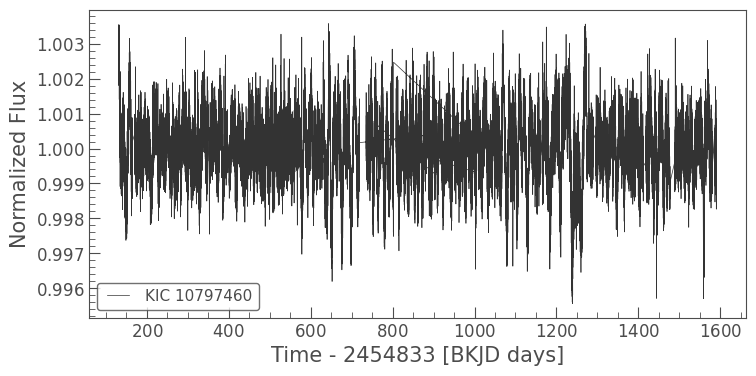

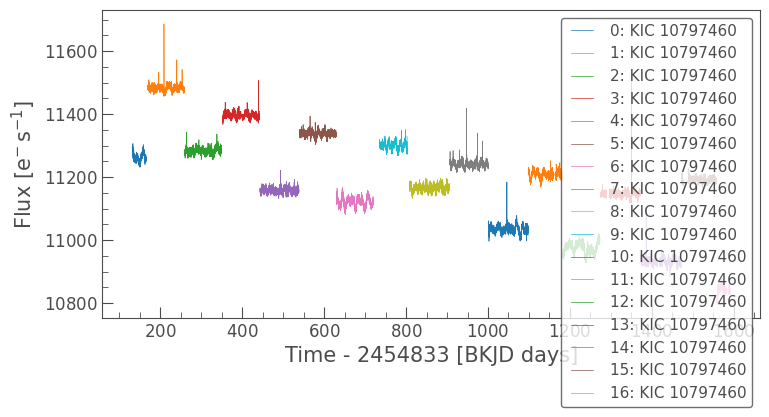

In [ ]:
curve_collection,curve_stitched=extract_curves(df_koi.iloc[1])
curve_stitched.plot()
curve_collection.plot()

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

def process_lightcurve_raw_wavelet(kic_id, i, wavelet_name="sym5", wavelet_level=5):
    """
    Descarga y transforma una curva de luz de un objeto Kepler usando wavelets.

    Parámetros:
    - kic_id: ID numérico del objeto (por ejemplo: 757076)
    - wavelet_name: nombre del wavelet a usar (ej. 'sym5', 'db4')
    - wavelet_level: nivel de descomposición wavelet
    """
    row = df_koi.iloc[i]
    try:
        print(f"Descargando curva de luz de KIC {kic_id}...")
        period, t0, duration_hours, koi_disposition = row['koi_period'], row['koi_time0bk'], row['koi_duration'], row['koi_disposition']
        search_result = lk.search_lightcurve(f'KIC {kic_id}', mission='Kepler')
        lc = search_result[2:4].download().remove_outliers().remove_nans()
        klc = lc.fold(period=period, epoch_time=t0)

        # Extraer datos
        time = klc.time.value
        flux = klc.flux.value

        # Transformación wavelet
        wl = pywt.Wavelet(wavelet_name)
        coeffs = pywt.wavedec(flux, wl, level=wavelet_level)
        # Puedes modificar esto para ver qué pasa al eliminar algunos niveles:
        coeffs_filtered = coeffs.copy()
        coeffs_filtered[-1] = np.zeros_like(coeffs_filtered[-1])  # Eliminar el detalle más fino
        recon_flux = pywt.waverec(coeffs_filtered, wavelet=wl)

        # Recortar en caso de diferencia de tamaño tras reconstrucción
        recon_flux = recon_flux[:len(time)]

        # Graficar
        fig, ax = plt.subplots(figsize=(14, 6), dpi=100)
        ax.plot(time, flux, label='Original', color='gray', alpha=0.5)
        ax.plot(time, recon_flux, label=f'Wavelet {wavelet_name} - {wavelet_level}', color='blue')

        #ax.set_title(f"Curva de luz Kepler (KIC {kic_id}) con suavizado Savitzky–Golay", fontsize=14)
        ax.set_xlabel("Tiempo (días)", fontsize=12)
        ax.set_ylabel("Flujo normalizado", fontsize=12)
        ax.legend()
        ax.grid(True, which='both', linestyle='--', alpha=0.4)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error al procesar el objeto KIC {kic_id}: {e}")


CONFIRMED
ID: KOI 10797460
Descargando curva de luz de KIC 10797460...


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


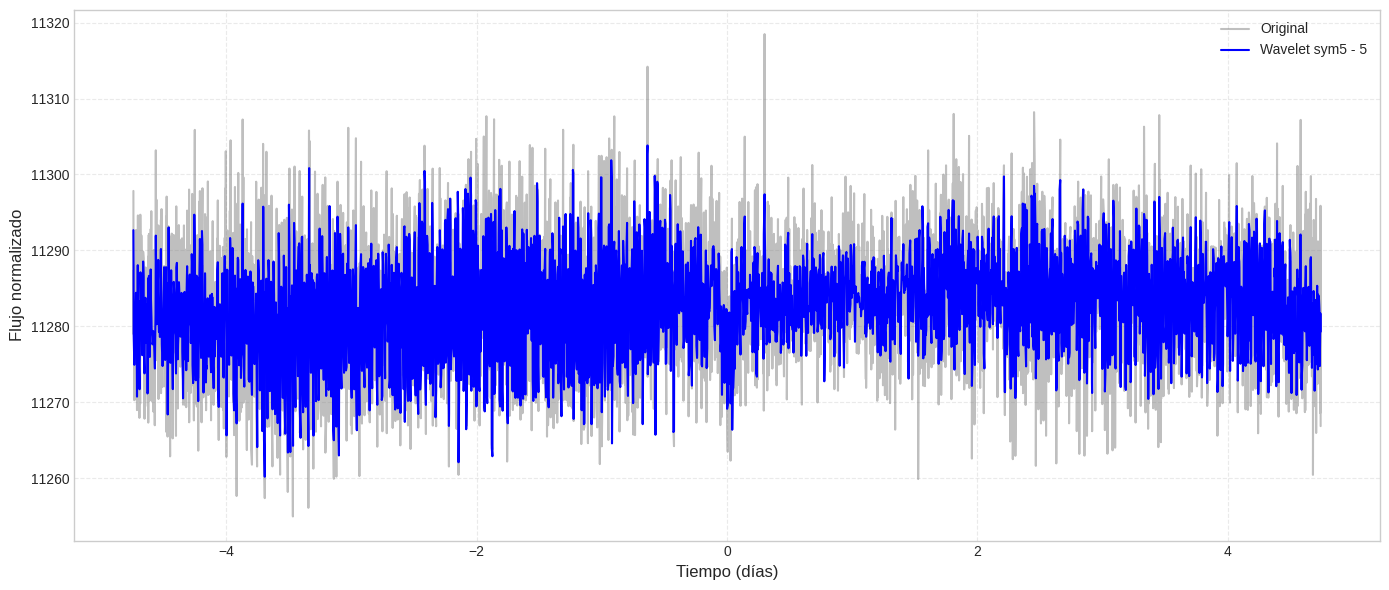

CONFIRMED
ID: KOI 10797460
Descargando curva de luz de KIC 10797460...


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


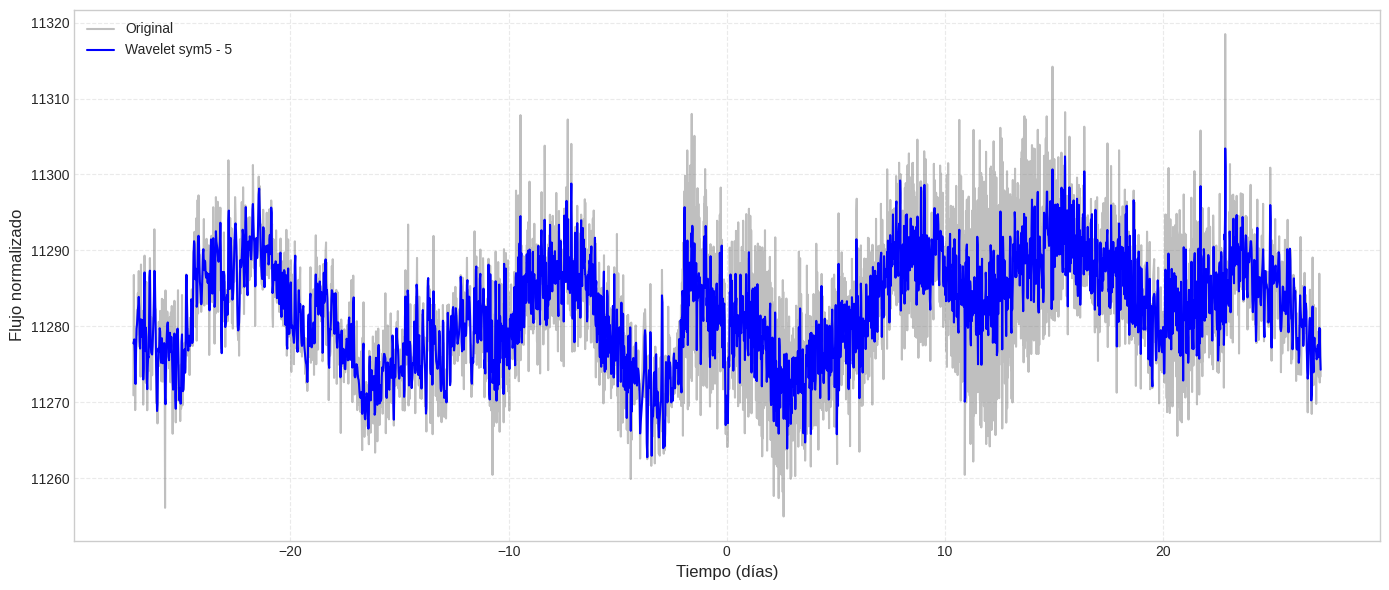

FALSE POSITIVE
ID: KOI 10848459
Descargando curva de luz de KIC 10848459...


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


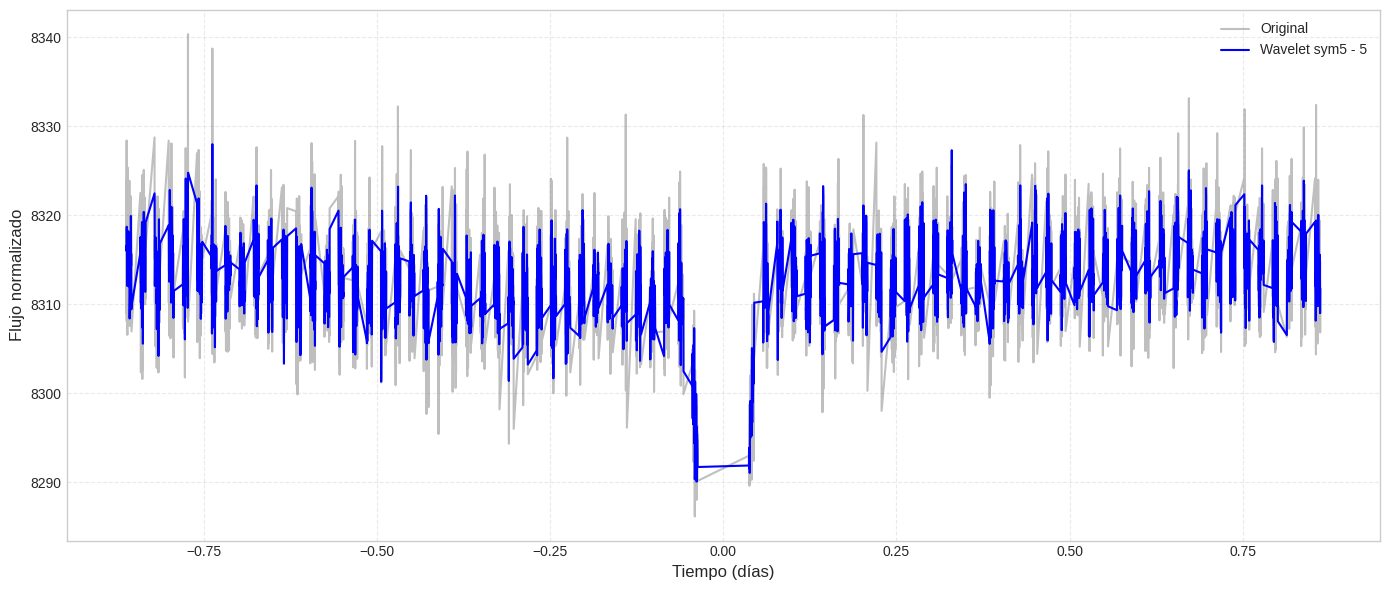

In [ ]:
for i in range(0, 3):
  print(df_koi["koi_disposition"][i])
  print("ID: KOI" , df_koi["kepid"][i])
  process_lightcurve_raw_wavelet(df_koi.iloc[i]['kepid'], i)

In [ ]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

plt.style.use("seaborn-v0_8-whitegrid")

def process_lightcurve_raw_savgol(kic_id, i, window_length=81, polyorder=8):
    """
    Descarga y suaviza una curva de luz de un objeto Kepler usando el filtro Savitzky–Golay.

    Parámetros:
    - kic_id: ID numérico del objeto (por ejemplo: 757076)
    - window_length: tamaño de ventana (impar) para el filtro
    - polyorder: orden del polinomio para el ajuste
    """

    row = df_koi.iloc[i]
    try:
        period, t0, duration_hours, koi_disposition = row['koi_period'], row['koi_time0bk'], row['koi_duration'], row['koi_disposition']
        search_result = lk.search_lightcurve(f'KIC {kic_id}', mission='Kepler')
        lc = search_result[2:4].download().remove_outliers().remove_nans()
        klc = lc.fold(period=period, epoch_time=t0)

        print("Analizando KOI:", row["kepid"])

        # Extraer datos
        time = klc.time.value
        flux = klc.flux.value

         # Transformación wavelet
        wl = pywt.Wavelet("sym5")
        coeffs = pywt.wavedec(flux, wl, level=5)
        # Puedes modificar esto para ver qué pasa al eliminar algunos niveles:
        coeffs_filtered = coeffs.copy()
        coeffs_filtered[-1] = np.zeros_like(coeffs_filtered[-1])  # Eliminar el detalle más fino
        recon_flux = pywt.waverec(coeffs_filtered, wavelet=wl)

        # Recortar en caso de diferencia de tamaño tras reconstrucción
        recon_flux = recon_flux[:len(time)]


        # Asegurar que la ventana es válida
        if window_length >= len(flux):
            raise ValueError("El parámetro 'window_length' debe ser menor que la longitud de la señal.")
        if window_length % 2 == 0:
            window_length += 1  # Asegurarse de que sea impar

        # Aplicar filtro Savitzky–Golay
        smoothed_flux = savgol_filter(flux, window_length=window_length, polyorder=polyorder)

        # Graficar
        fig, ax = plt.subplots(figsize=(14, 6), dpi=100)
        ax.plot(time, flux, label='Original', color='gray', alpha=0.4)
        ax.plot(time, recon_flux, label=f'Wavelet sym5 - 5', color='aqua', alpha=0.6)
        ax.plot(time, smoothed_flux, label=f'Savitzky–Golay (w={window_length}, p={polyorder})', color='crimson', alpha=0.9)

        #ax.set_title(f"Curva de luz Kepler (KIC {kic_id}) con suavizado Savitzky–Golay", fontsize=14)
        ax.set_xlabel("Tiempo (días)", fontsize=12)
        ax.set_ylabel("Flujo normalizado", fontsize=12)
        ax.legend()
        ax.grid(True, which='both', linestyle='--', alpha=0.4)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error al procesar el objeto KIC {kic_id}: {e}")


Few-Shot Correcto

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 5872150


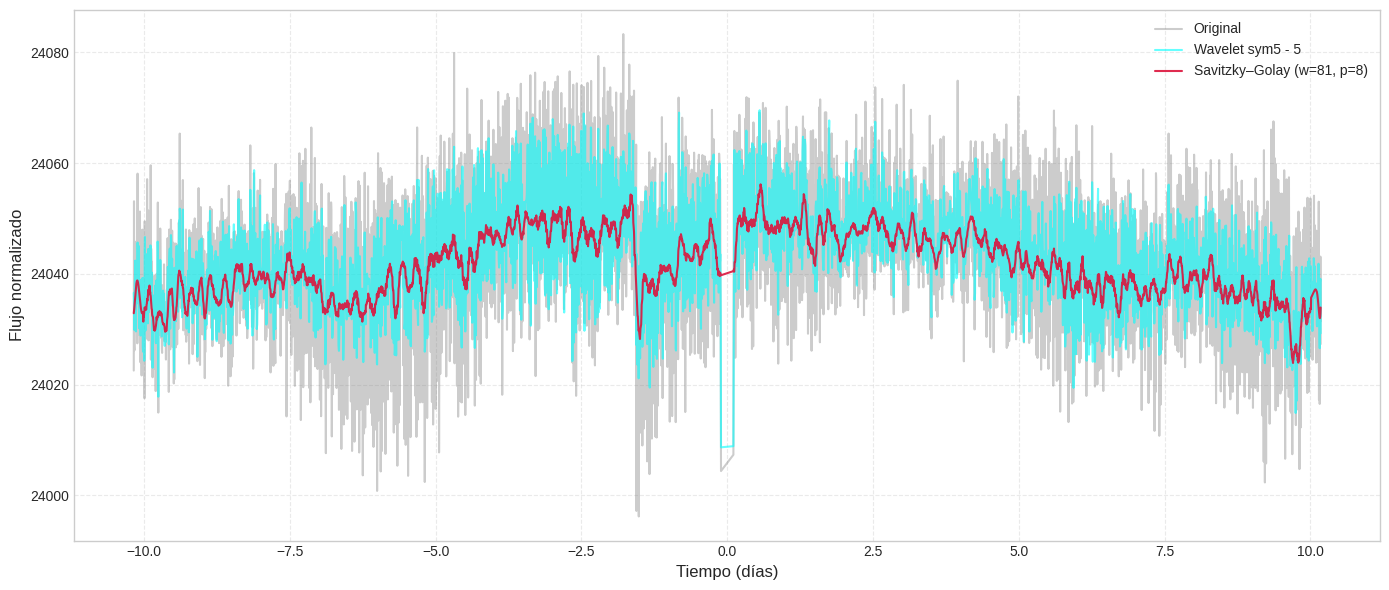

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 8264070


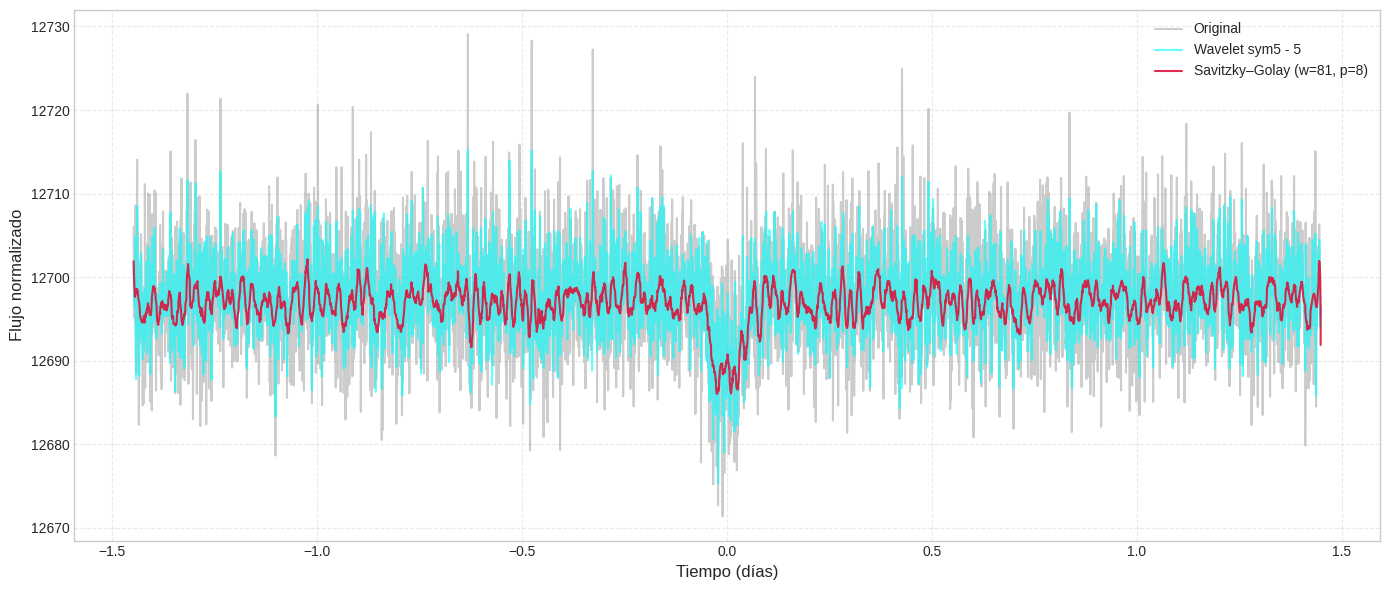

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 12012439


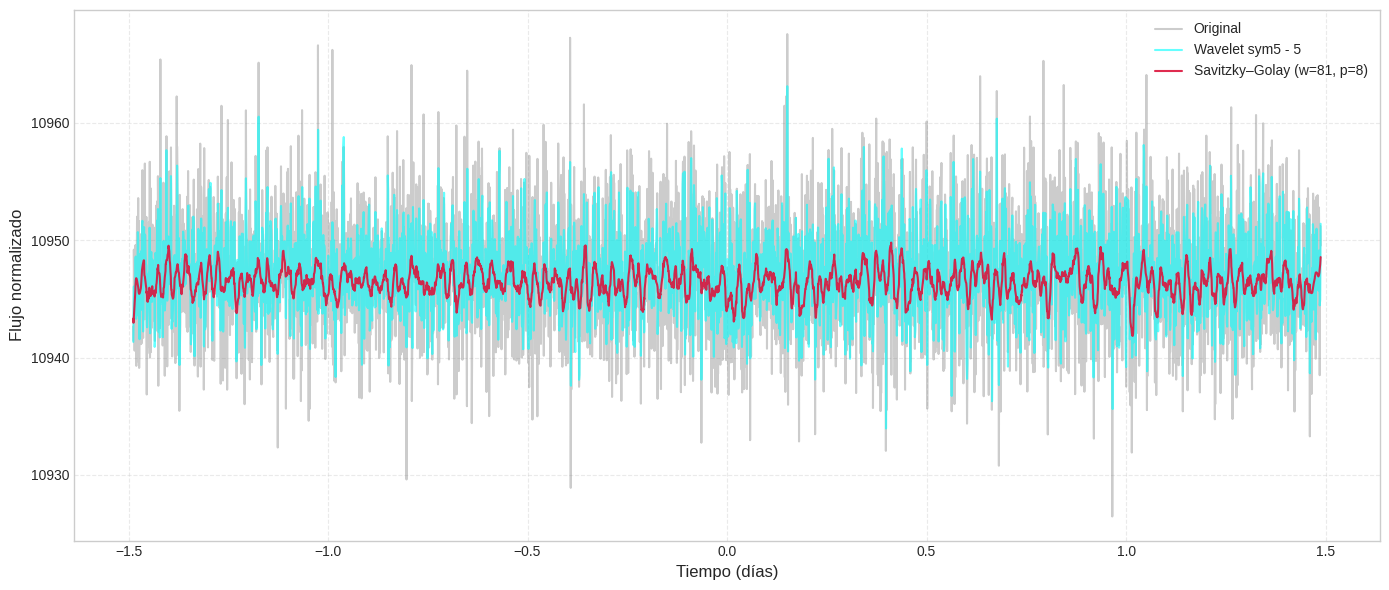

In [ ]:
casos = [5872150, 8264070, 12012439]
for kid in casos:
  i = df_koi[df_koi["kepid"] == kid].index[0]
  print(df_koi["koi_disposition"][i])
  process_lightcurve_raw_savgol(kid, i)

FewShot y Jerarquico Correctos

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 9823487


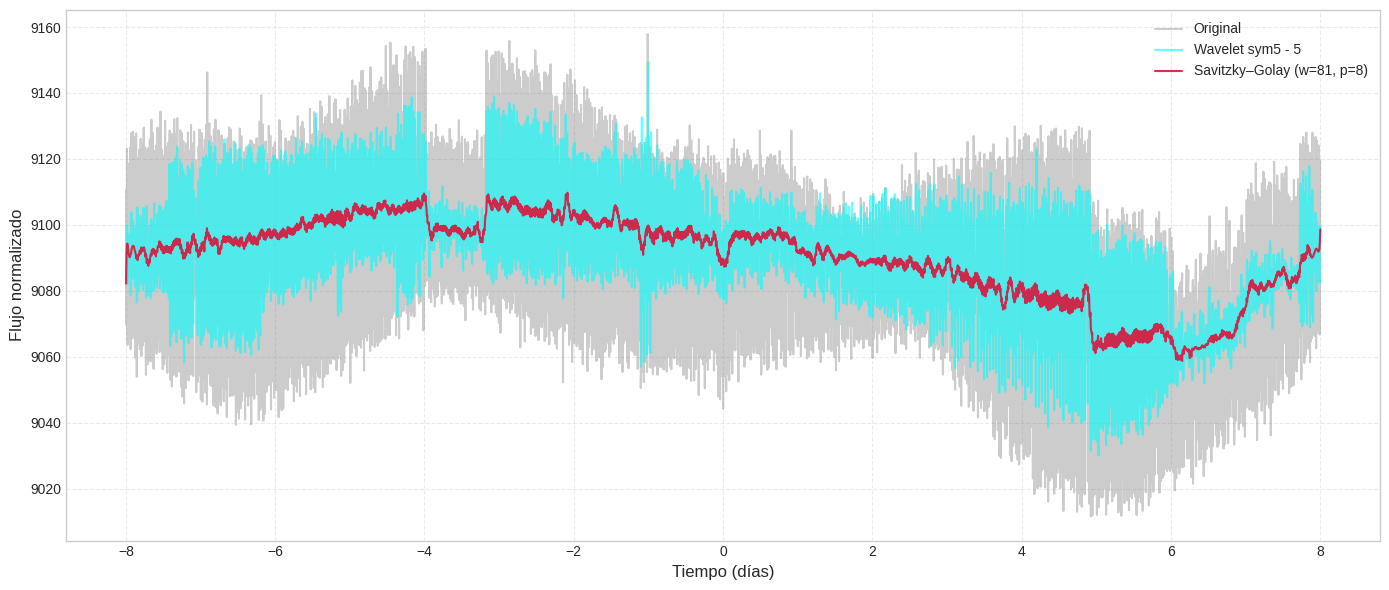

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 9480310


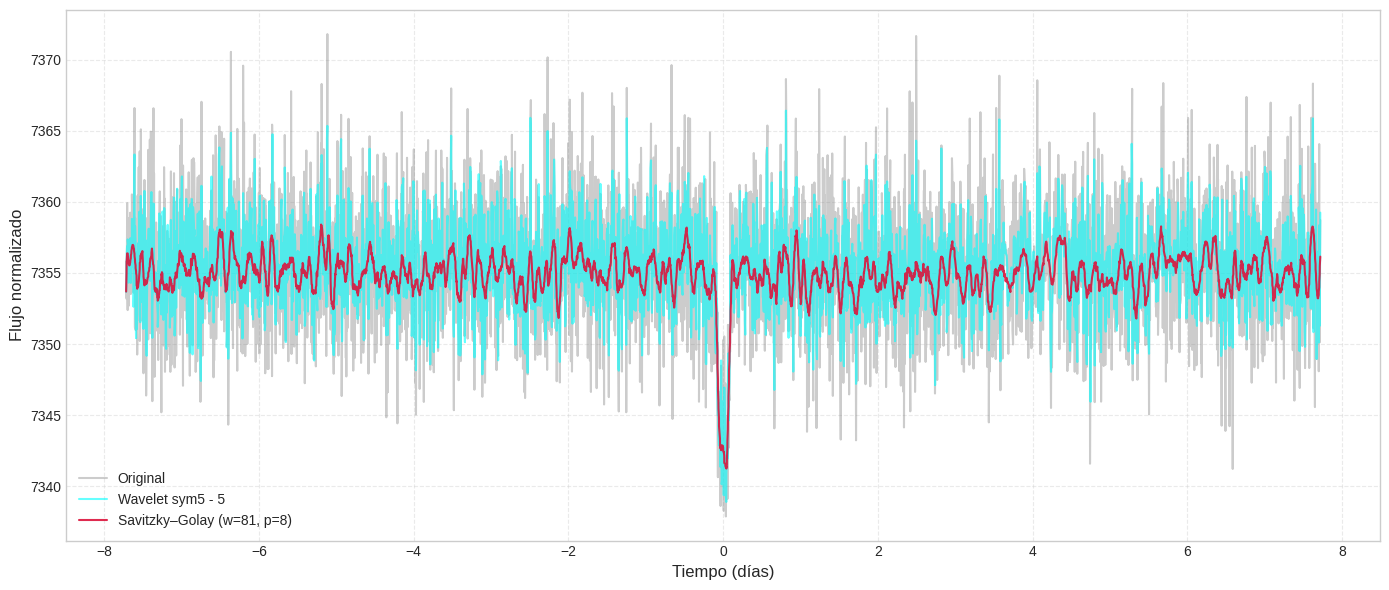

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 5965819


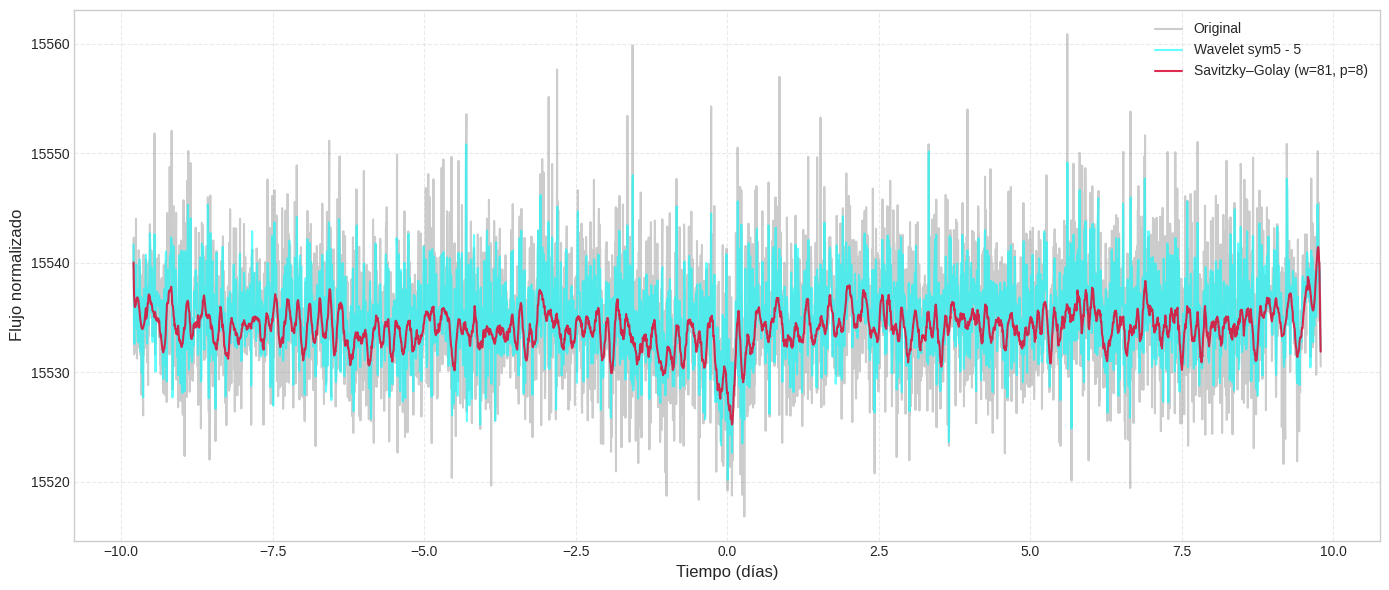

In [ ]:
casos = [5775129, 7368664, 9761615]
for kid in casos:
  i = df_koi[df_koi["kepid"] == kid].index[0]
  print(df_koi["koi_disposition"][i])
  process_lightcurve_raw_savgol(kid, i)

Contrastive Correcto

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 6233573


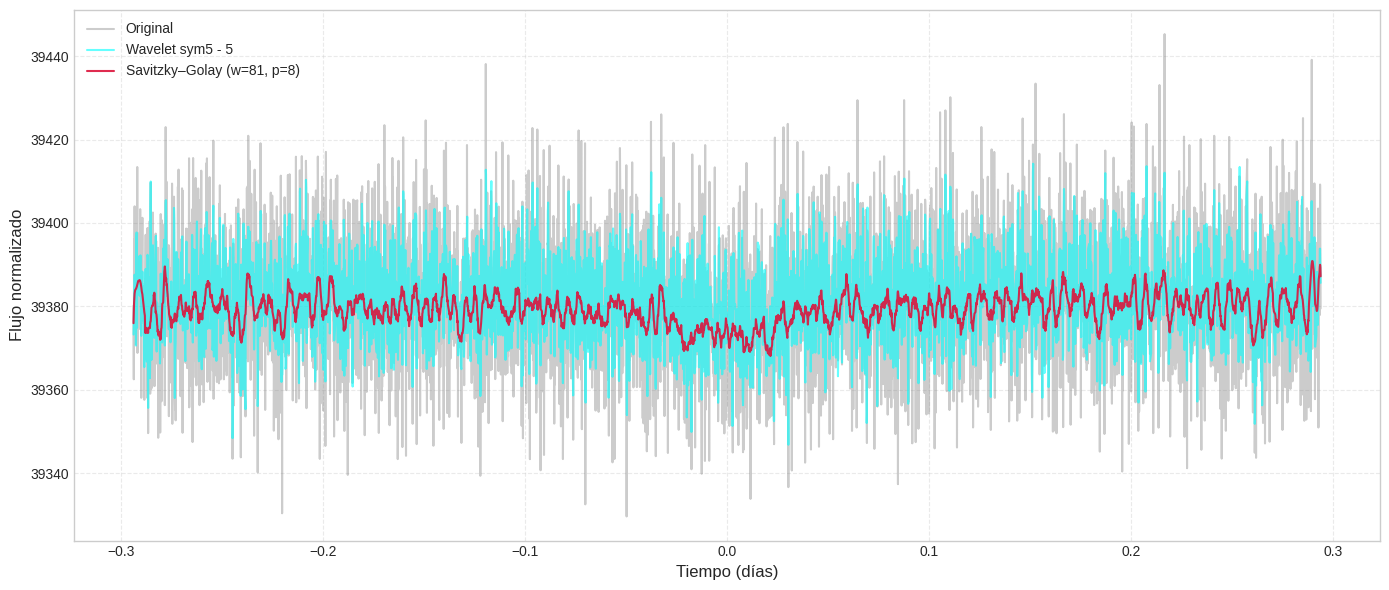

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 10425070


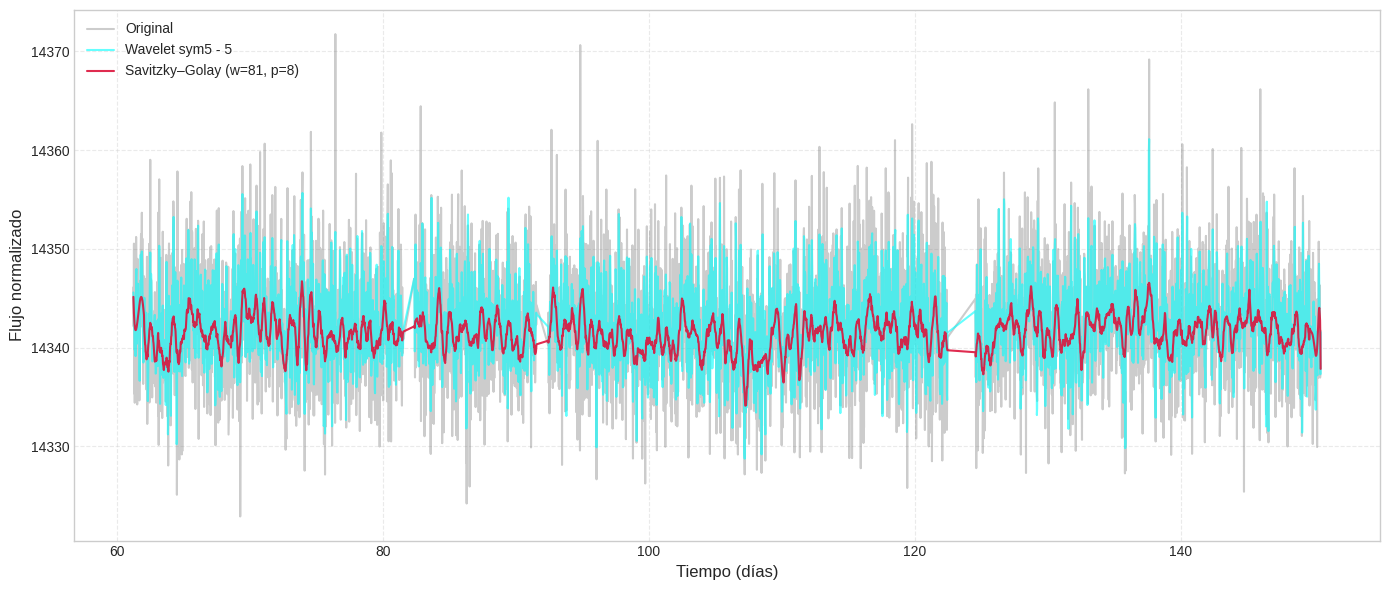

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 3343866


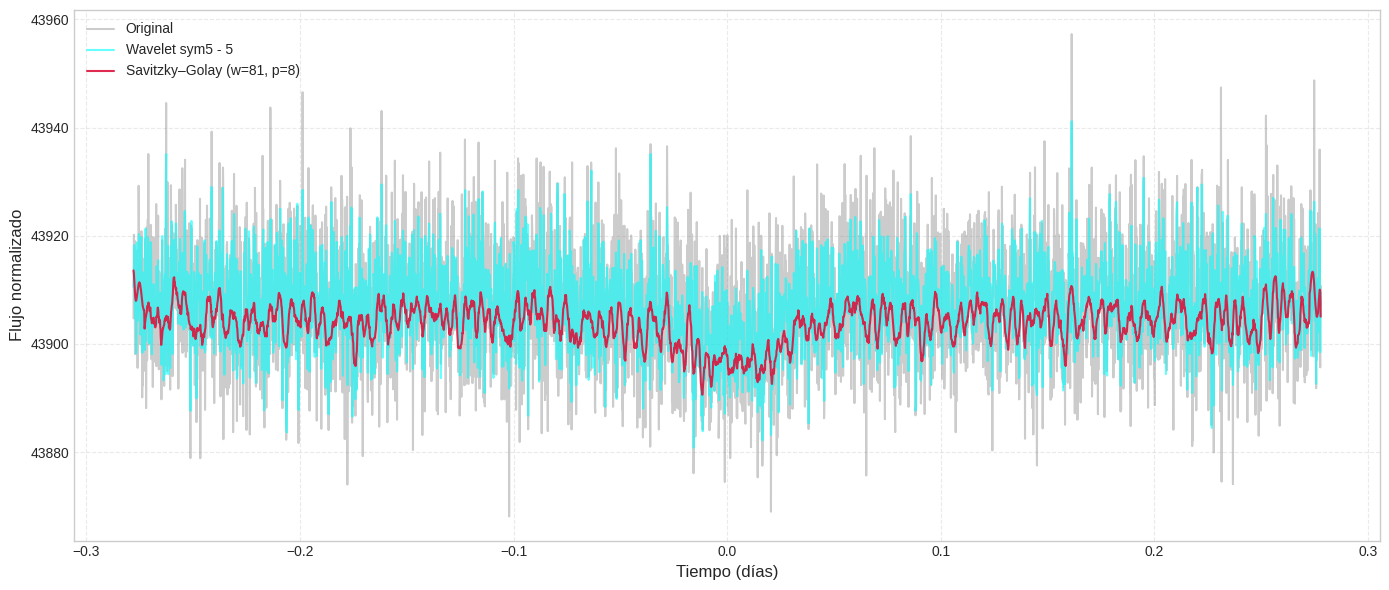

In [ ]:
casos = [6233573, 10425070, 3343866]
for kid in casos:
  i = df_koi[df_koi["kepid"] == kid].index[0]
  print(df_koi["koi_disposition"][i])
  process_lightcurve_raw_savgol(kid, i)

Jerarquico Correcto

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 9489524


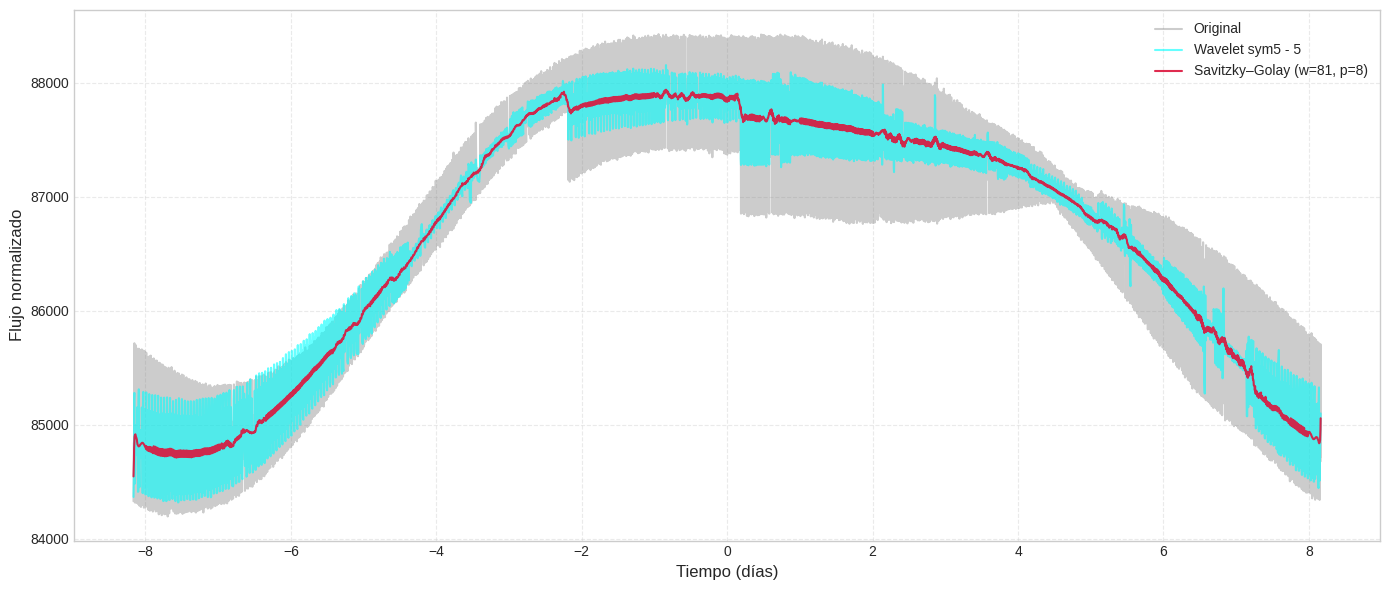

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 11073351


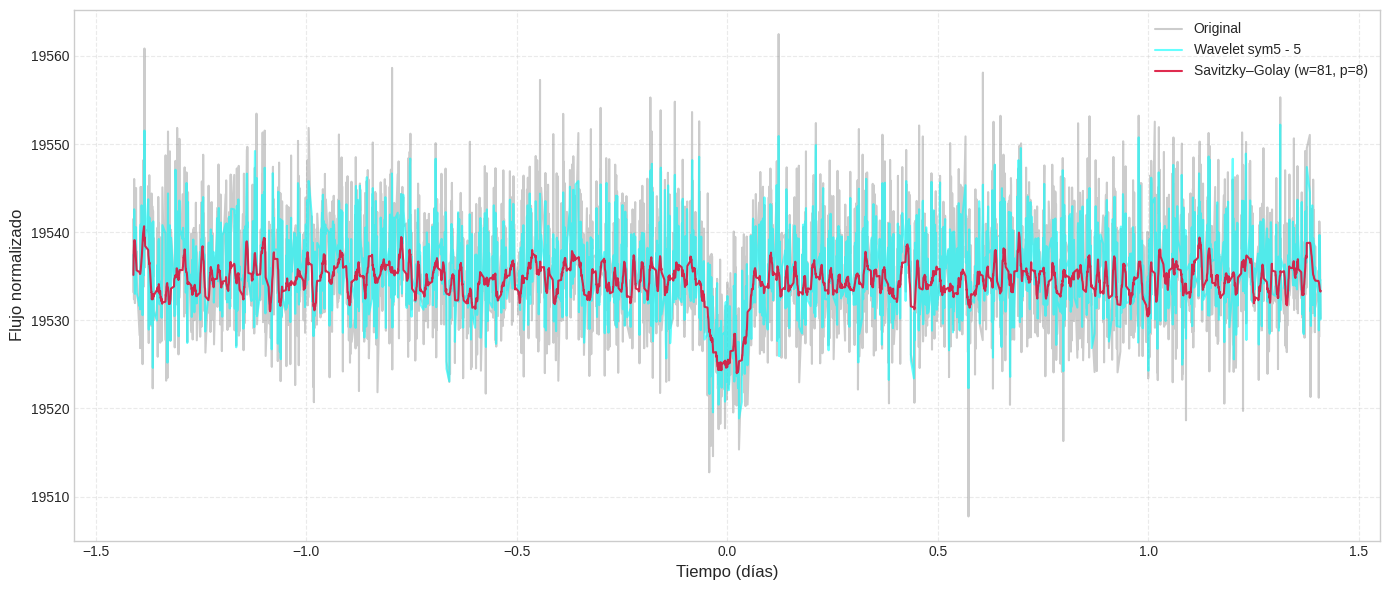

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 11718389


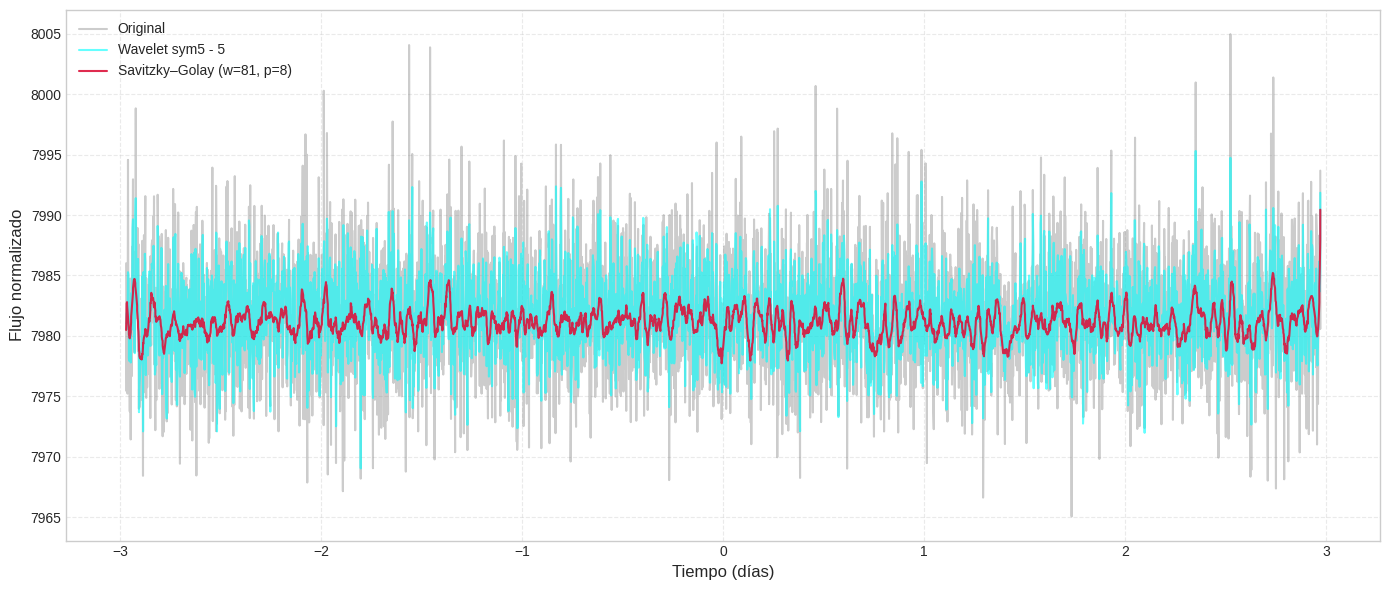

In [ ]:
casos = [9489524, 11073351, 11718389]
for kid in casos:
  i = df_koi[df_koi["kepid"] == kid].index[0]
  print(df_koi["koi_disposition"][i])
  process_lightcurve_raw_savgol(kid, i)

Todos incorrectos

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 5206233


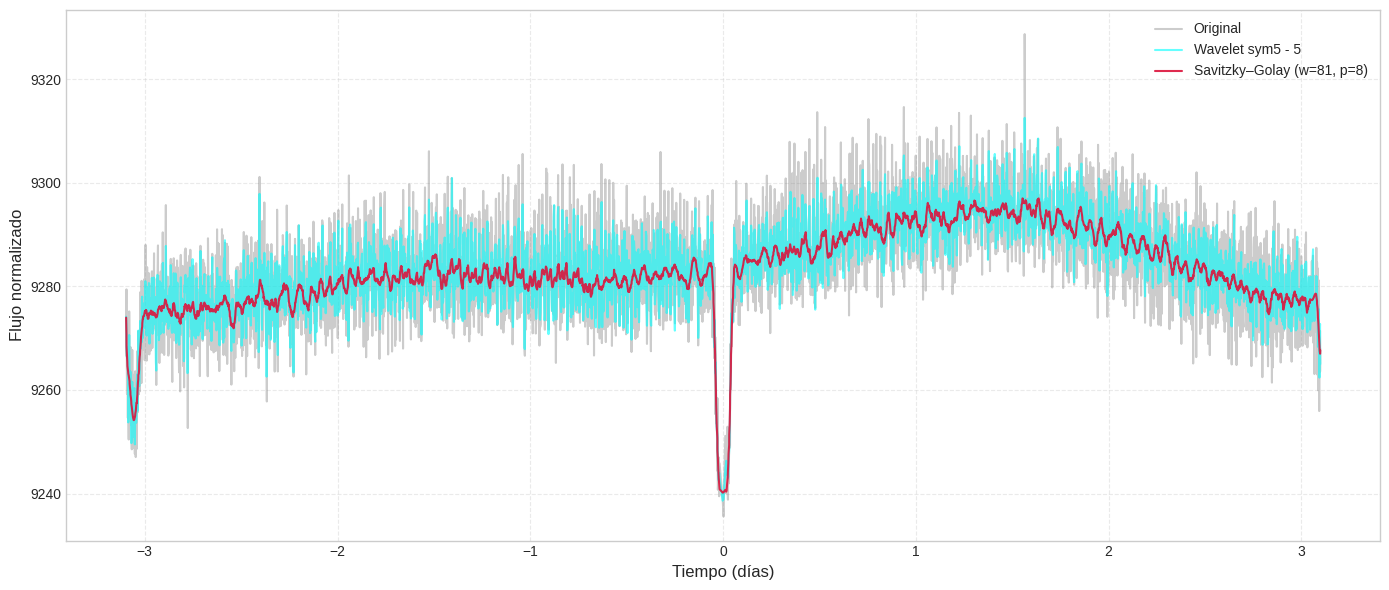

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 3554819


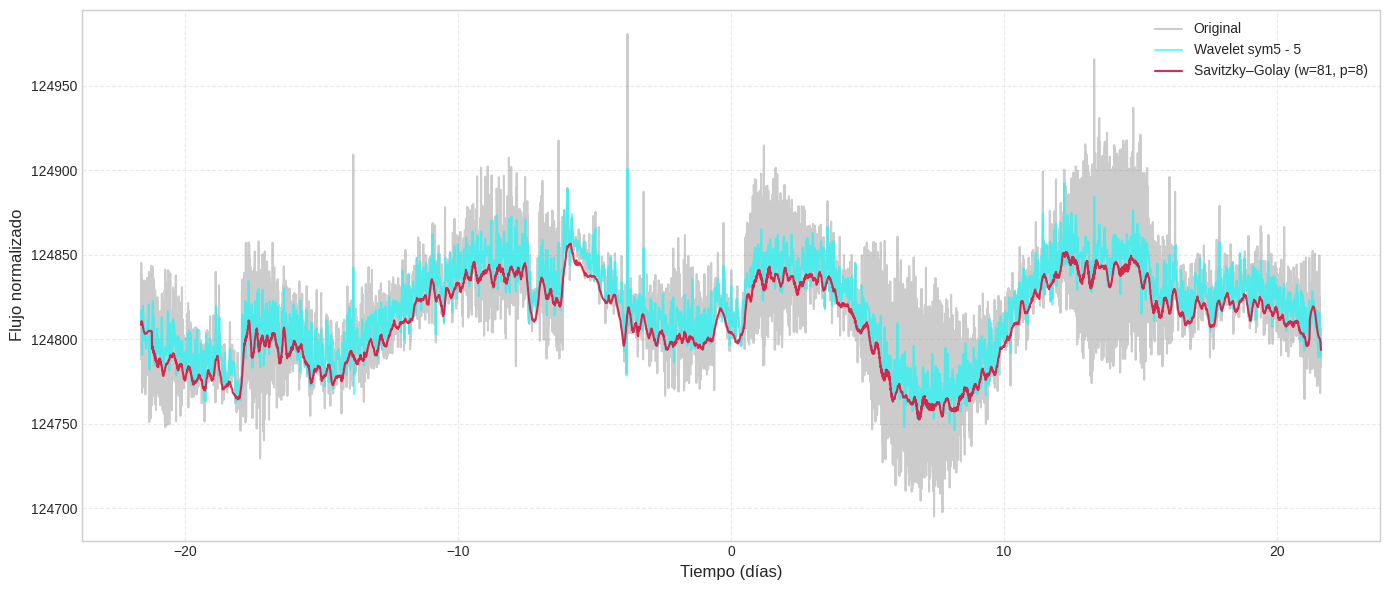

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 6447326


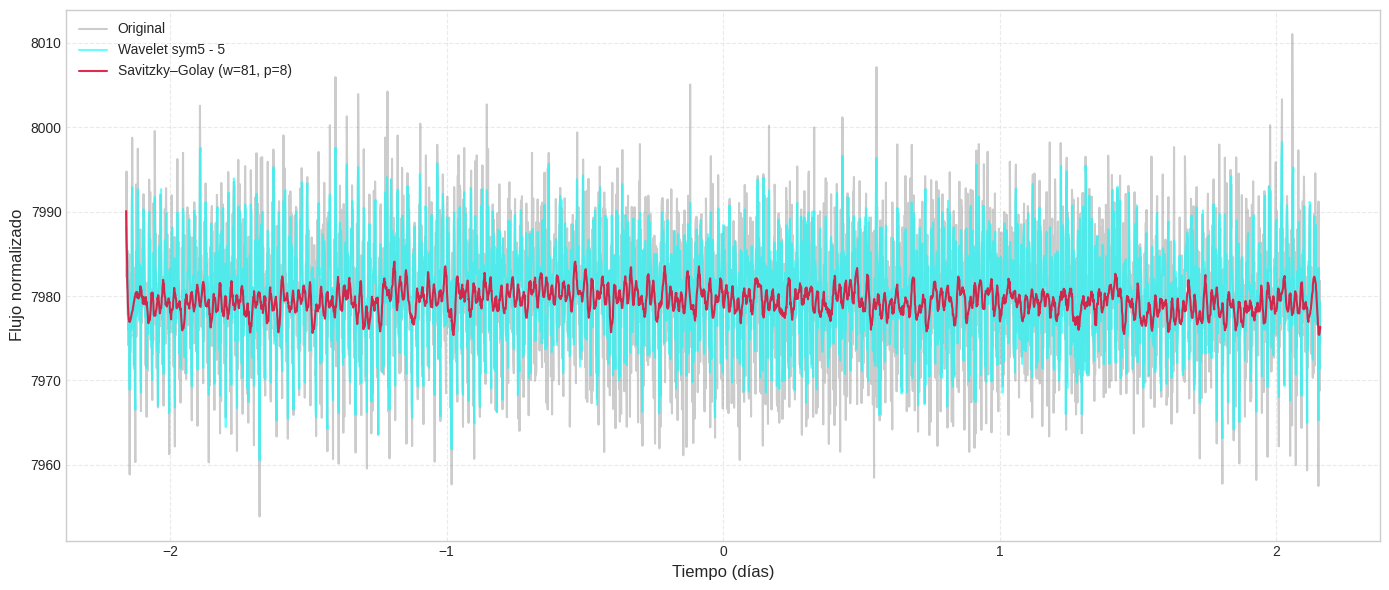

In [ ]:
casos = [5206233, 3554819, 6447326]
for kid in casos:
  i = df_koi[df_koi["kepid"] == kid].index[0]
  print(df_koi["koi_disposition"][i])
  process_lightcurve_raw_savgol(kid, i)

Few-Shot y Contrastivo Correctos

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 9640439


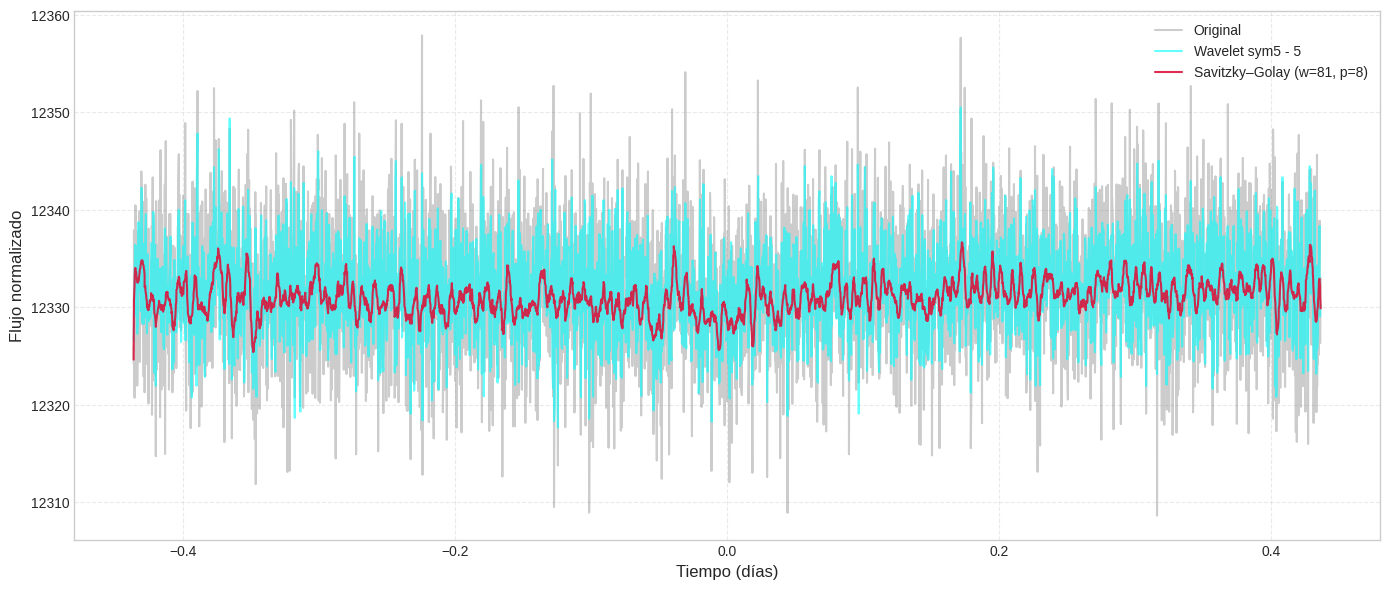

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 4150611


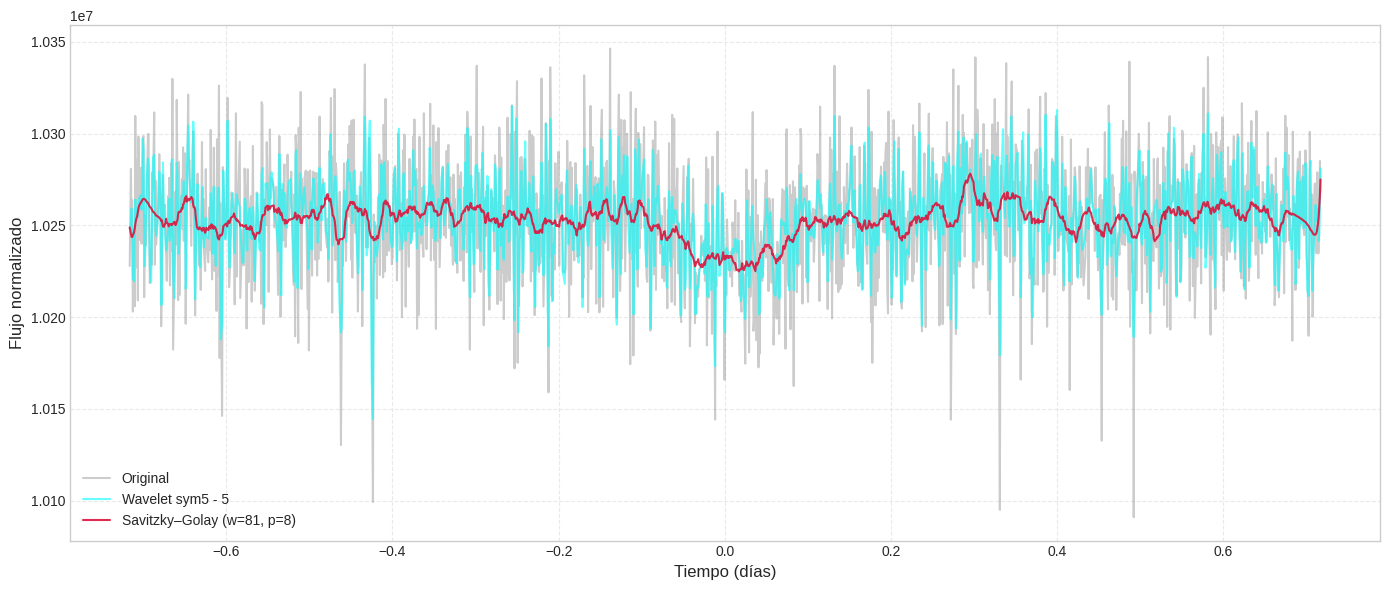

FALSE POSITIVE
Analizando KOI: 3239636


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


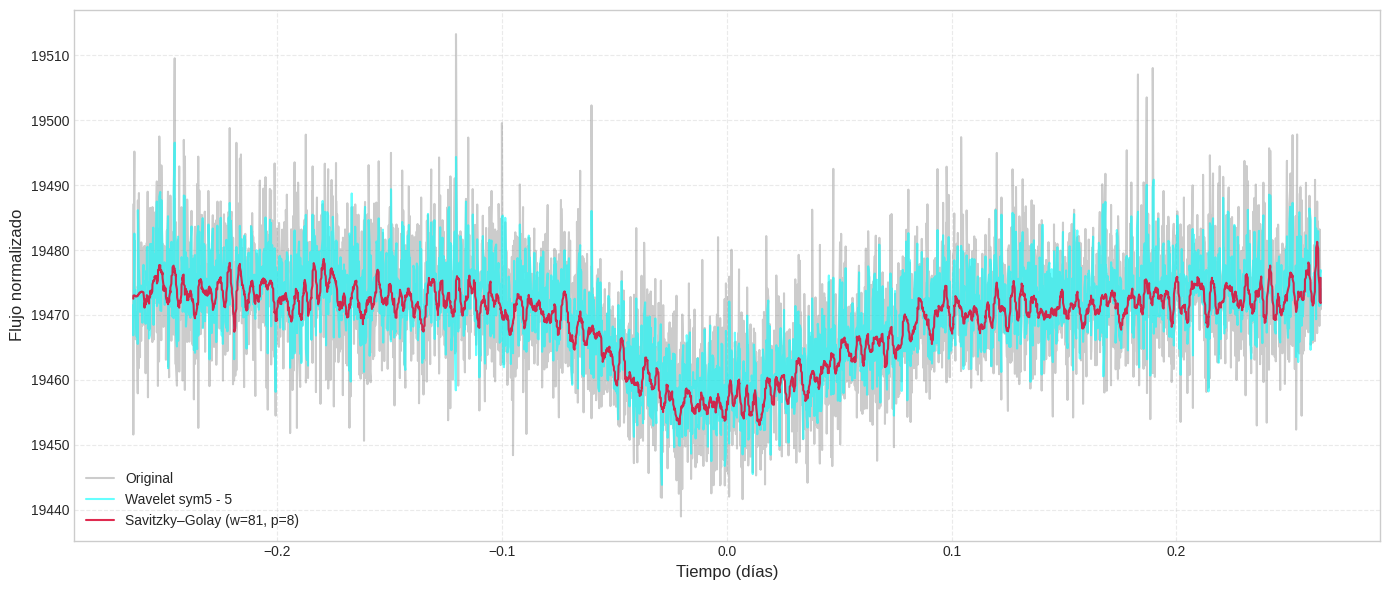

In [ ]:
casos = [9640439, 4150611, 3239636]
for kid in casos:
  i = df_koi[df_koi["kepid"] == kid].index[0]
  print(df_koi["koi_disposition"][i])
  process_lightcurve_raw_savgol(kid, i)

Contrastivo y Jerarquico Correctos

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 12021625


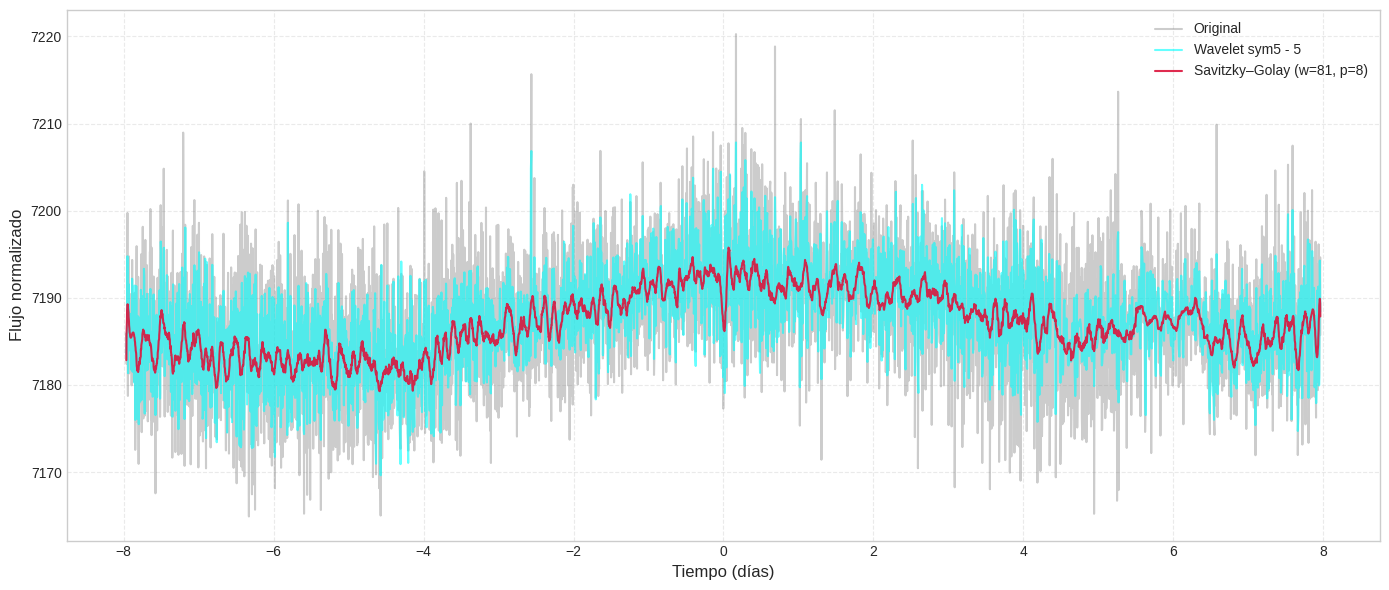

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 6678383


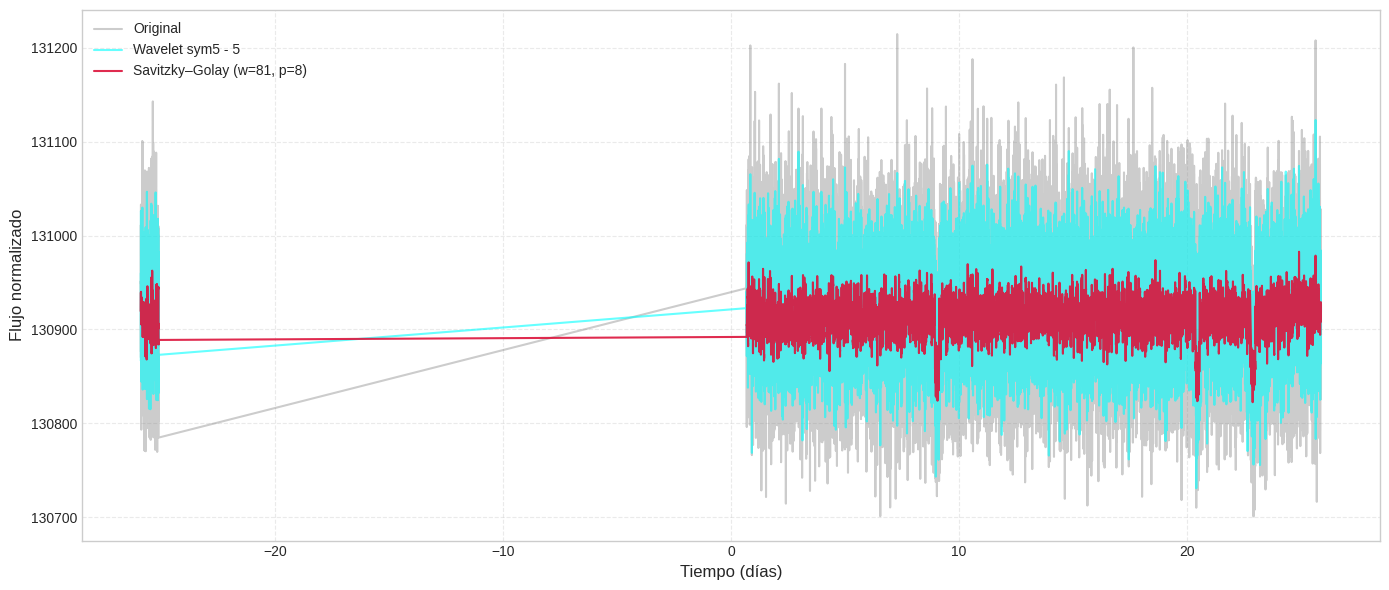

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 8321314


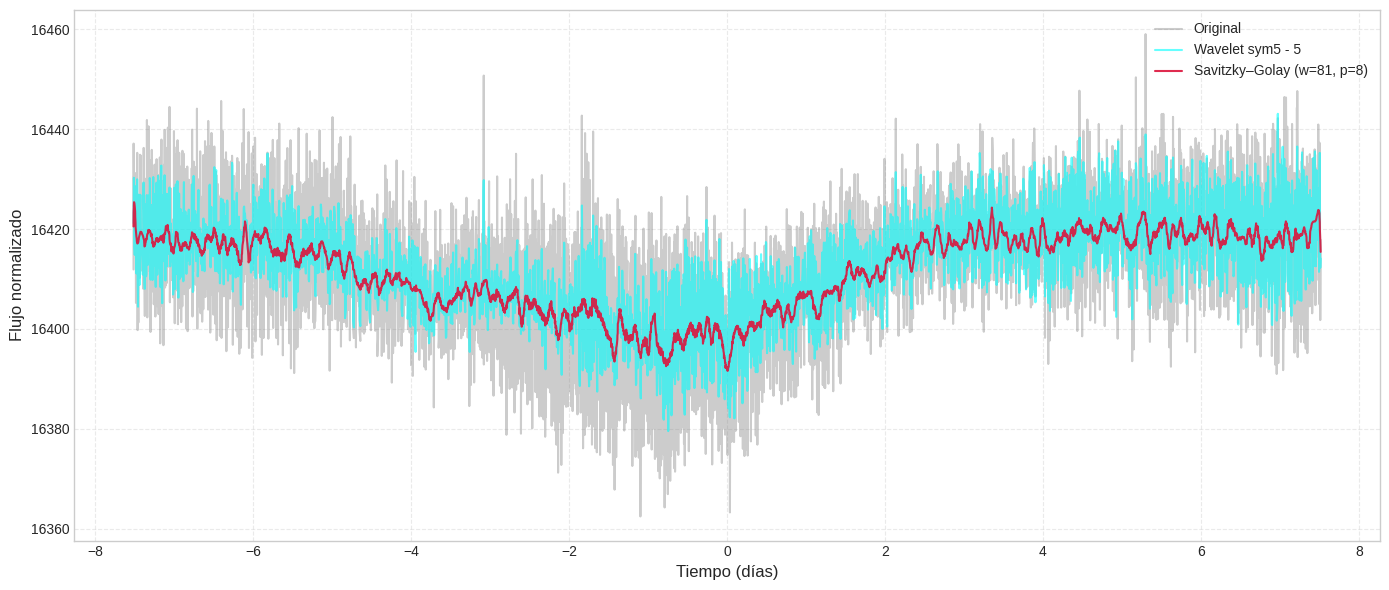

In [ ]:
casos = [12021625, 6678383, 8321314]
for kid in casos:
  i = df_koi[df_koi["kepid"] == kid].index[0]
  print(df_koi["koi_disposition"][i])
  process_lightcurve_raw_savgol(kid, i)

Todos Correctos

FALSE POSITIVE


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 7770471


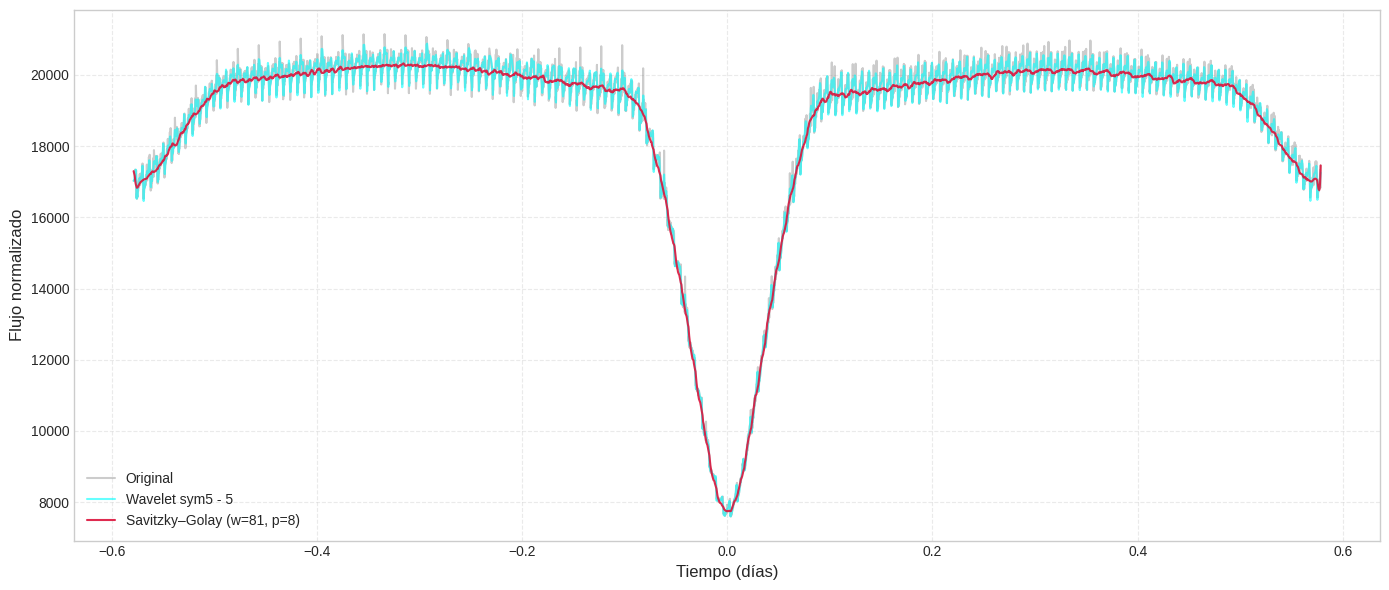

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 9757613


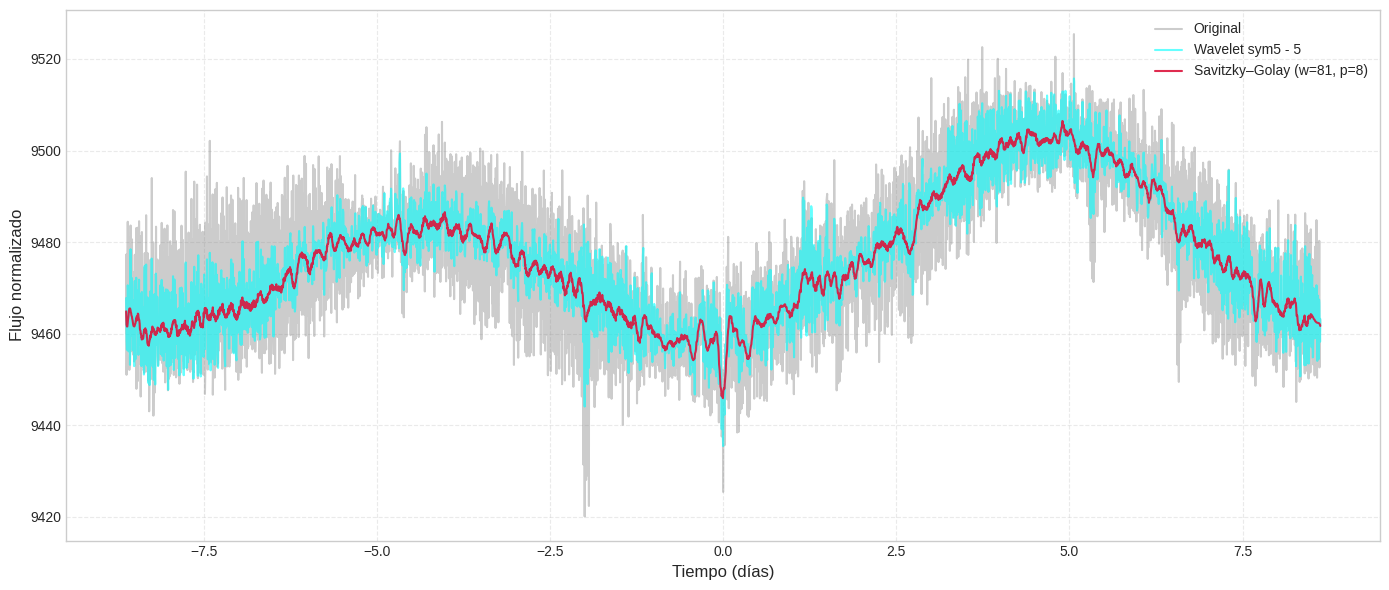

CONFIRMED


/usr/local/lib/python3.12/dist-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


Analizando KOI: 3762468


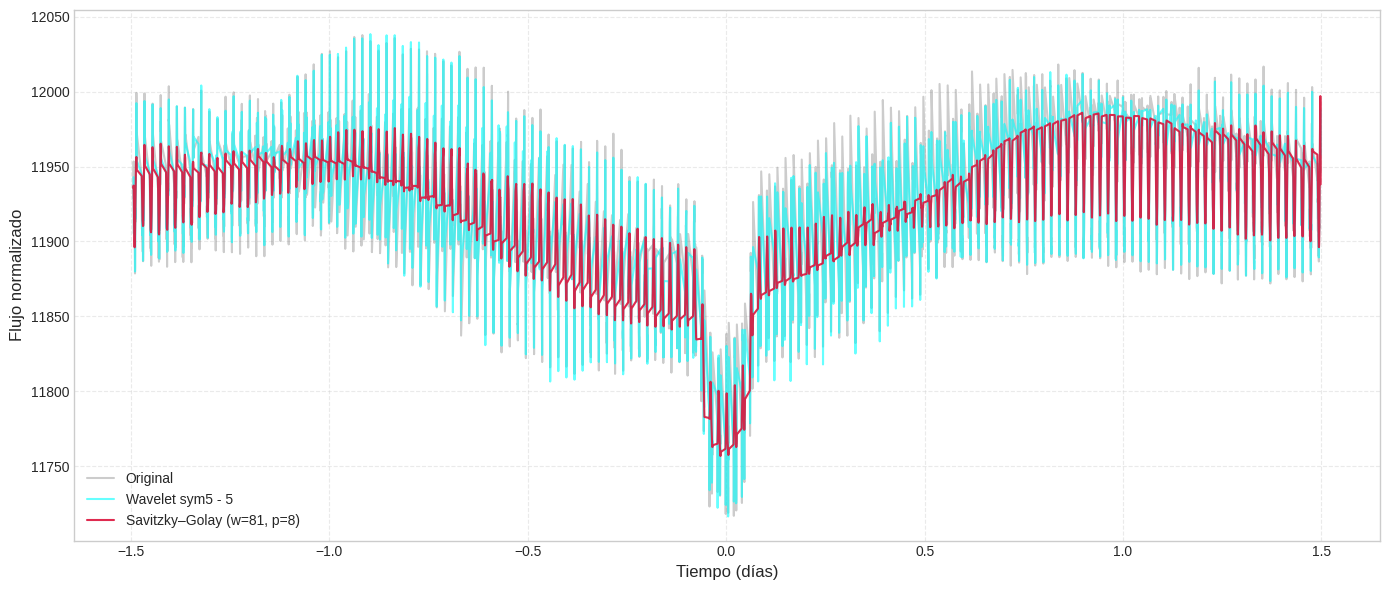

In [ ]:
casos = [7770471, 9757613, 3762468]
for kid in casos:
  i = df_koi[df_koi["kepid"] == kid].index[0]
  print(df_koi["koi_disposition"][i])
  process_lightcurve_raw_savgol(kid, i)

Evaluacion entre modelos

In [ ]:
import matplotlib.pyplot as plt # para plotear datos
import pandas as pd
import numpy as np
import pywt
import pywt.data
from matplotlib.pyplot import figure

for i in range(1,9):
  df_compare = pd.read_excel("por_grupo.xlsx", sheet_name="H"+str(i))
  print(df_compare)
  print("Longitud:  "+ str(len(df_compare)))

dfs = []
for i in range(1,9):
    df = pd.read_excel("por_grupo.xlsx", sheet_name=f"H{i}")
    df["Grupo"] = f"H{i}"
    dfs.append(df)

df_all = pd.concat(dfs, ignore_index=True)

       ID   FewShot Contrastive Jerarquico     kepid
0       3  Correcto    Correcto   Correcto  10854555
1      18  Correcto    Correcto   Correcto  10583066
2      52  Correcto    Correcto   Correcto  11754553
3      53  Correcto    Correcto   Correcto  11754553
4      62  Correcto    Correcto   Correcto  12066335
..    ...       ...         ...        ...       ...
167  6197  Correcto    Correcto   Correcto   5300878
168  6308  Correcto    Correcto   Correcto  11922782
169  6396  Correcto    Correcto   Correcto   5444392
170  6918  Correcto    Correcto   Correcto   9588880
171  6988  Correcto    Correcto   Correcto   9912977

[172 rows x 5 columns]
Longitud:  172
       ID   FewShot Contrastive  Jerarquico     kepid
0     137  Correcto    Correcto  Incorrecto   5534814
1     179  Correcto    Correcto  Incorrecto  11869052
2     297  Correcto    Correcto  Incorrecto   4044005
3     299  Correcto    Correcto  Incorrecto   6066403
4     304  Correcto    Correcto  Incorrecto   2851100
.

  koi_disposition  Correcto  Incorrecto  Total  %Correcto       Modelo
0       CONFIRMED       426         563    989  43.073812      FewShot
1  FALSE POSITIVE       573         370    943  60.763521      FewShot
0       CONFIRMED       590         399    989  59.656218  Contrastive
1  FALSE POSITIVE       741         202    943  78.579003  Contrastive
0       CONFIRMED       978          11    989  98.887765   Jerarquico
1  FALSE POSITIVE        64         879    943   6.786850   Jerarquico


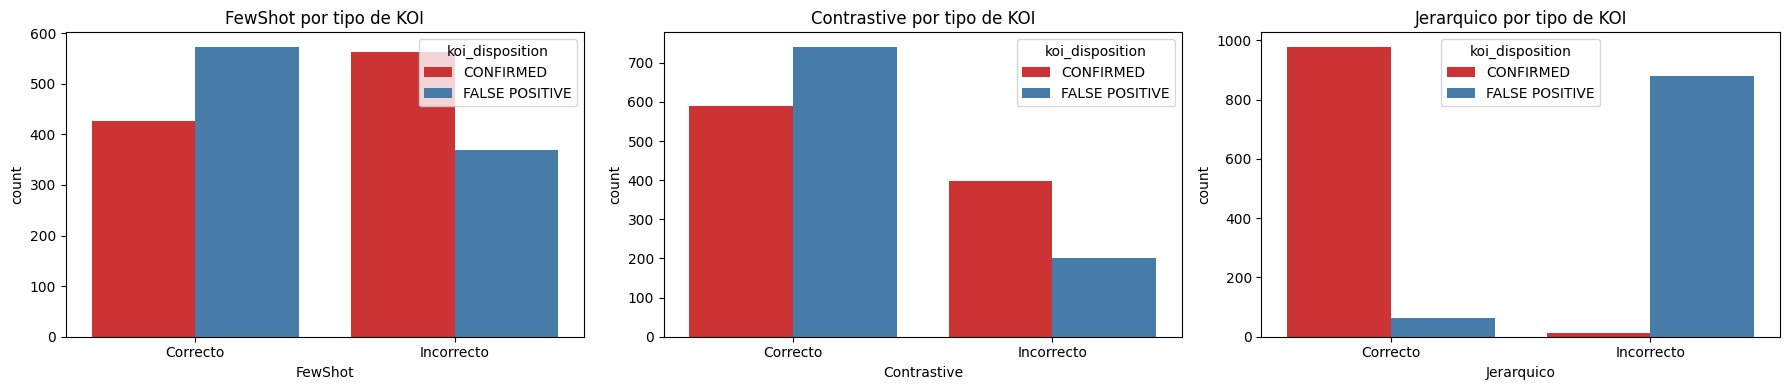

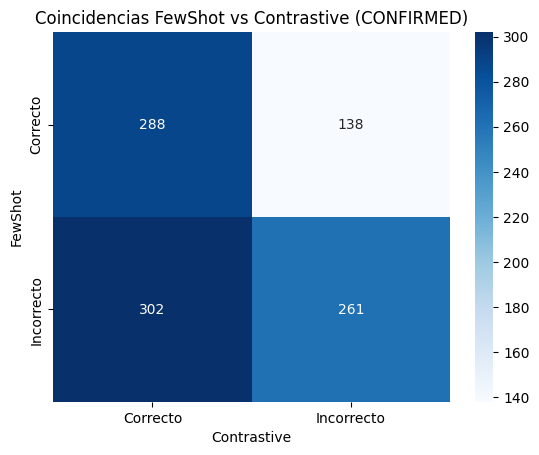

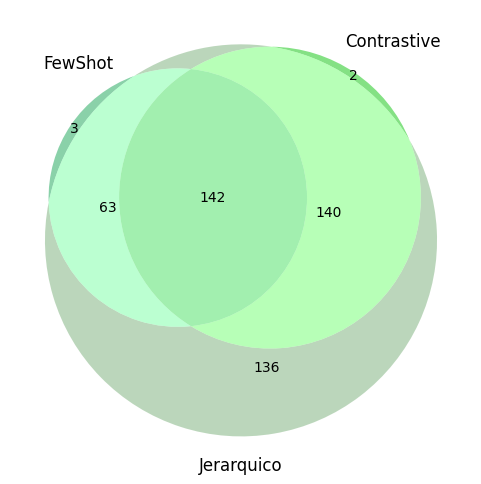

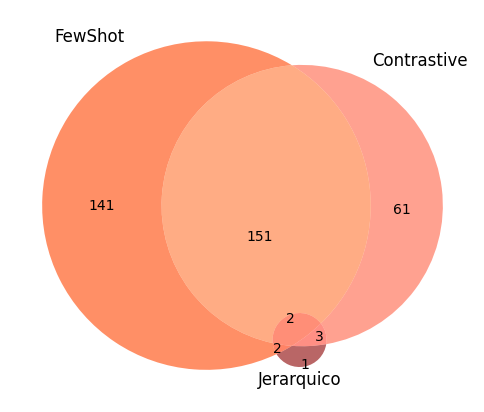

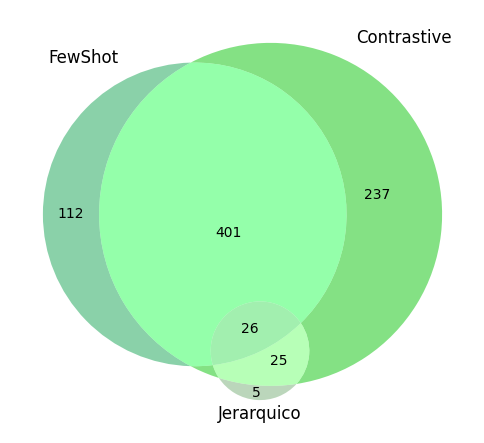

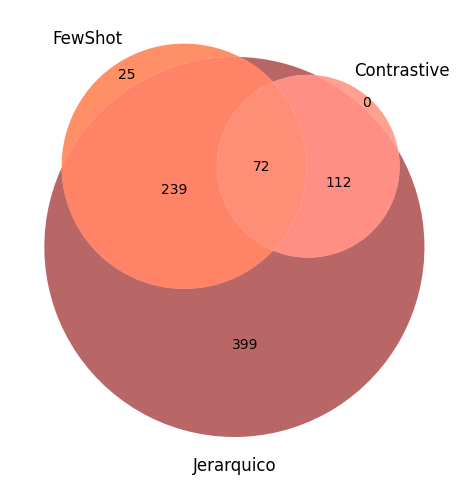

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3, venn3_circles

# === 1. Merge df_all con df_koi ===
df_merged = df_all.merge(
    df_koi[['kepid', 'koi_disposition']],
    on='kepid',
    how='left'
)
df_merged['koi_disposition'] = df_merged['koi_disposition'].fillna('UNKNOWN')

# === 2. Estadísticas básicas por modelo y disposition ===
stats_list = []
for model in ["FewShot", "Contrastive", "Jerarquico"]:
    stats = df_merged.groupby('koi_disposition')[model].value_counts().unstack().fillna(0)
    stats['Total'] = stats.sum(axis=1)
    stats['%Correcto'] = stats.get('Correcto', 0) / stats['Total'] * 100
    stats['Modelo'] = model
    stats_list.append(stats.reset_index())

df_stats = pd.concat(stats_list)
print(df_stats)

# === 3. Visualización: barras por modelo y koi_disposition ===
fig, ax = plt.subplots(1,3, figsize=(18,4))
for i, model in enumerate(["FewShot", "Contrastive", "Jerarquico"]):
    sns.countplot(
        data=df_merged,
        x=model,
        hue='koi_disposition',
        ax=ax[i],
        palette="Set1"
    )
    ax[i].set_title(f"{model} por tipo de KOI")
plt.tight_layout()
plt.show()

# === 4. Heatmap de coincidencias entre modelos solo para CONFIRMED ===
df_confirmed = df_merged[df_merged['koi_disposition']=='CONFIRMED']
pivot = pd.crosstab(df_confirmed["FewShot"], df_confirmed["Contrastive"])
sns.heatmap(pivot, annot=True, fmt="d", cmap="Blues")
plt.title("Coincidencias FewShot vs Contrastive (CONFIRMED)")
plt.show()

for disp in ['CONFIRMED','FALSE POSITIVE']:
    subset = df_merged[df_merged['koi_disposition']==disp]

    # Aciertos
    few_correct = set(subset.loc[subset["FewShot"]=="Correcto", "kepid"])
    con_correct = set(subset.loc[subset["Contrastive"]=="Correcto", "kepid"])
    jer_correct = set(subset.loc[subset["Jerarquico"]=="Correcto", "kepid"])

    # Errores
    few_wrong = set(subset.loc[subset["FewShot"]=="Incorrecto", "kepid"])
    con_wrong = set(subset.loc[subset["Contrastive"]=="Incorrecto", "kepid"])
    jer_wrong = set(subset.loc[subset["Jerarquico"]=="Incorrecto", "kepid"])

for disp in ['CONFIRMED','FALSE POSITIVE']:
    subset = df_merged[df_merged['koi_disposition']==disp]

    # Aciertos
    few_correct = set(subset.loc[subset["FewShot"]=="Correcto", "kepid"])
    con_correct = set(subset.loc[subset["Contrastive"]=="Correcto", "kepid"])
    jer_correct = set(subset.loc[subset["Jerarquico"]=="Correcto", "kepid"])

    # Errores
    few_wrong = set(subset.loc[subset["FewShot"]=="Incorrecto", "kepid"])
    con_wrong = set(subset.loc[subset["Contrastive"]=="Incorrecto", "kepid"])
    jer_wrong = set(subset.loc[subset["Jerarquico"]=="Incorrecto", "kepid"])

    # === Venn de aciertos ===
    plt.figure(figsize=(6,6))
    venn3([few_correct, con_correct, jer_correct],
          set_labels=("FewShot","Contrastive","Jerarquico"),
          set_colors=("mediumseagreen","limegreen","darkseagreen"),
          alpha=0.6)
    plt.show()

    # === Venn de errores ===
    plt.figure(figsize=(6,6))
    venn3([few_wrong, con_wrong, jer_wrong],
          set_labels=("FewShot","Contrastive","Jerarquico"),
          set_colors=("orangered","tomato","darkred"),
          alpha=0.6)
    plt.show()


In [ ]:
# 1. Conteo total vs. únicos
print("Filas totales en df_merged:", df_merged.shape[0])
print("Kepid únicos en df_merged:", df_merged["kepid"].nunique())

# 2. Lista de kepid con más de una aparición
dup_counts = df_merged.groupby("kepid").size().sort_values(ascending=False)
print("Kepid con >1 filas:\n", dup_counts[dup_counts > 1].head(10))


Filas totales en df_merged: 1932
Kepid únicos en df_merged: 1350
Kepid con >1 filas:
 kepid
11709124    20
3832474     15
11968463    12
10187017    12
8247638     12
5511081     12
4852528     10
9002278     10
10227020     8
4150611      8
dtype: int64


✅ Porcentaje de aciertos por disposición KOI:
                 FewShot  Contrastive  Jerarquico
koi_disposition                                  
CONFIRMED          43.07        59.66       98.89
FALSE POSITIVE     60.76        78.58        6.79


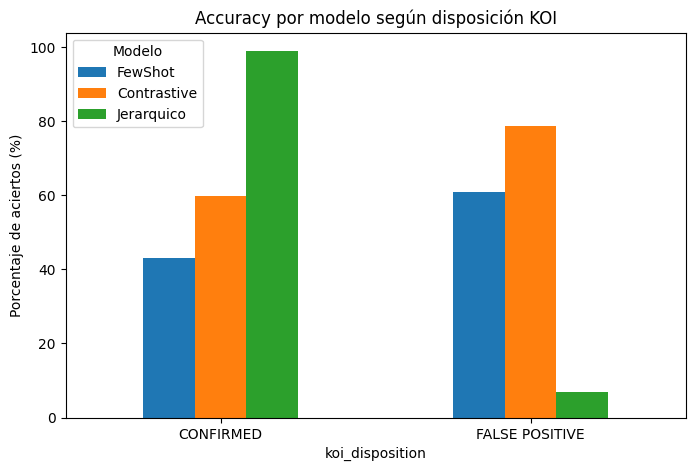


📊 Dificultad (cuántos modelos aciertan) según disposición KOI:
num_correctos     0    1    2    3
koi_disposition                   
CONFIRMED         1  268  434  286
FALSE POSITIVE   74  388  453   28


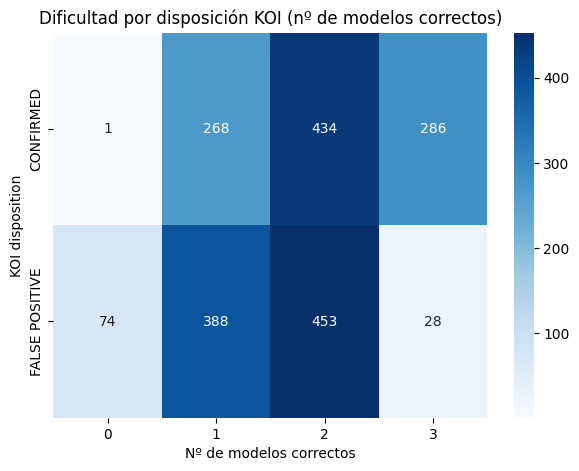

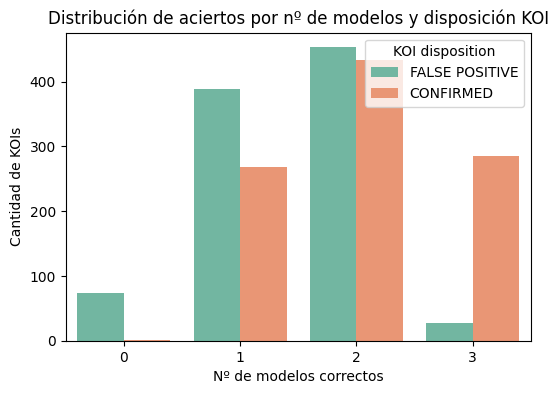

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# === 1. Merge df_all con KOI ===
df_merged = df_all.merge(
    df_koi[['kepid', 'koi_disposition']],
    on="kepid",
    how="left"
)

# === 2. Tabla de correctos/incorrectos por modelo y disposición KOI ===
tabla_resumen = df_merged.groupby(["koi_disposition"])[["FewShot", "Contrastive", "Jerarquico"]].apply(
    lambda x: (x == "Correcto").sum()
)
tabla_totales = df_merged["koi_disposition"].value_counts()
tabla_resumen = tabla_resumen.div(tabla_totales, axis=0) * 100  # en porcentaje

print("✅ Porcentaje de aciertos por disposición KOI:")
print(tabla_resumen.round(2))

# === 3. Gráfico de barras comparando accuracy en CONFIRMED vs FALSE POSITIVE ===
tabla_resumen.plot(kind="bar", figsize=(8,5))
plt.title("Accuracy por modelo según disposición KOI")
plt.ylabel("Porcentaje de aciertos (%)")
plt.xticks(rotation=0)
plt.legend(title="Modelo")
plt.show()

# === 4. Robustez: dificultad de casos (nº de modelos correctos por ID) ===
df_merged["num_correctos"] = (df_merged[["FewShot","Contrastive","Jerarquico"]] == "Correcto").sum(axis=1)

# Tabla resumen de dificultad por clase KOI
tabla_dificultad = pd.crosstab(df_merged["koi_disposition"], df_merged["num_correctos"])
print("\n📊 Dificultad (cuántos modelos aciertan) según disposición KOI:")
print(tabla_dificultad)

# === 5. Heatmap de dificultad ===
plt.figure(figsize=(7,5))
sns.heatmap(tabla_dificultad, annot=True, fmt="d", cmap="Blues")
plt.title("Dificultad por disposición KOI (nº de modelos correctos)")
plt.ylabel("KOI disposition")
plt.xlabel("Nº de modelos correctos")
plt.show()

# === 6. Distribución de nº de aciertos global ===
plt.figure(figsize=(6,4))
sns.countplot(data=df_merged, x="num_correctos", hue="koi_disposition", palette="Set2")
plt.title("Distribución de aciertos por nº de modelos y disposición KOI")
plt.xlabel("Nº de modelos correctos")
plt.ylabel("Cantidad de KOIs")
plt.legend(title="KOI disposition")
plt.show()


/tmp/ipython-input-407529834.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub["Modelos"], rotation=30, ha="right")
/tmp/ipython-input-407529834.py:104: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(sub["Modelos"], rotation=30, ha="right")


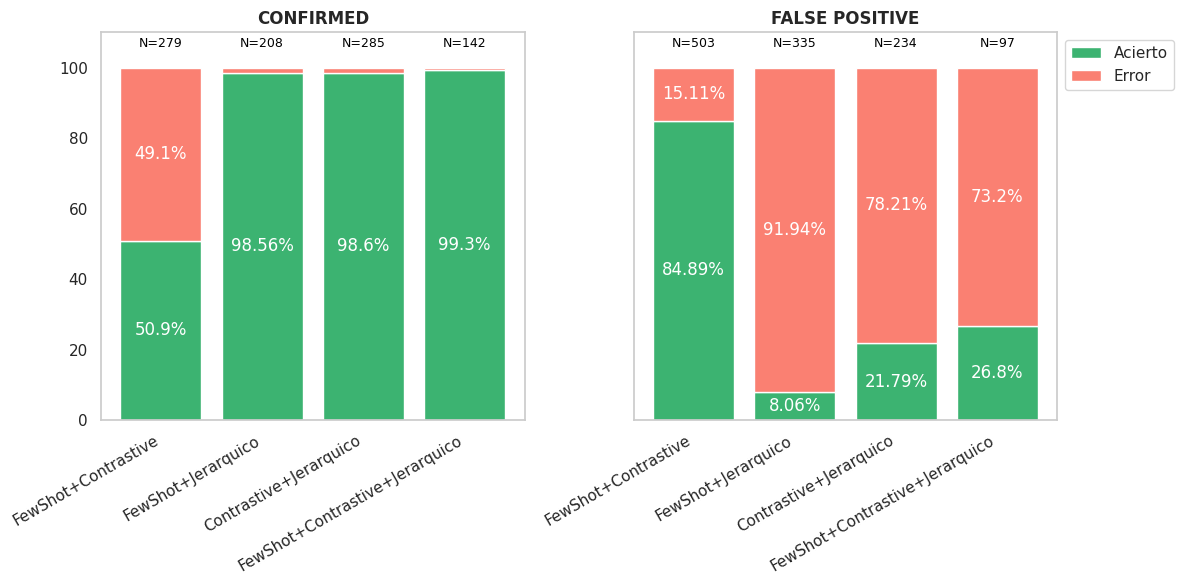

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

def resumen_conjuntos(df, modelos, disp):
    # 1) Filtrar y eliminar duplicados de kepid
    subset = (
        df[df["koi_disposition"] == disp]
          .drop_duplicates(subset="kepid", keep="first")
    )

    # 2) Construir sets de IDs acierto/error
    correct_sets = [
        set(subset.loc[subset[m] == "Correcto", "kepid"])
        for m in modelos
    ]
    wrong_sets = [
        set(subset.loc[subset[m] == "Incorrecto", "kepid"])
        for m in modelos
    ]

    # 3) Intersección de todos los aciertos y de todos los errores
    aciertos_ids = set.intersection(*correct_sets)
    errores_ids  = set.intersection(*wrong_sets)

    # 4) Métricas
    n_aciertos  = len(aciertos_ids)
    n_errores   = len(errores_ids)
    total       = n_aciertos + n_errores
    pct_aciertos = (n_aciertos/total * 100) if total else 0
    pct_errores  = (n_errores/total  * 100) if total else 0

    return {
        "Modelos": "+".join(modelos),
        "Clase":    disp,
        "Coinciden_Acierto": round(pct_aciertos, 2),
        "Coinciden_Error":   round(pct_errores,  2),
        "N_total_coinc":     total
    }

# === Definimos pares y tríos ===
model_sets = [
    ["FewShot", "Contrastive"],
    ["FewShot", "Jerarquico"],
    ["Contrastive", "Jerarquico"],
    ["FewShot", "Contrastive", "Jerarquico"],
]

# Lista de disposiciones
dispos = df_merged["koi_disposition"].unique()

# Recolectamos resultados
resultados = []
for modelos in model_sets:
    for disp in dispos:
        resultados.append(resumen_conjuntos(df_merged, modelos, disp))

df_results = pd.DataFrame(resultados)

# === Plotting ===
fig, axes = plt.subplots(1, len(dispos), figsize=(6*len(dispos), 6), sharey=True)

for ax in axes:
    ax.grid(False)

colors = {
    "Coinciden_Acierto": "#3CB371",  # mediumseagreen
    "Coinciden_Error":   "#FA8072"   # salmon
}

for ax, disp in zip(axes, dispos):
    sub = df_results[df_results["Clase"] == disp]

    # Barras apiladas
    ax.bar(sub["Modelos"], sub["Coinciden_Acierto"],
           color=colors["Coinciden_Acierto"], label="Acierto")
    ax.bar(sub["Modelos"], sub["Coinciden_Error"],
           bottom=sub["Coinciden_Acierto"],
           color=colors["Coinciden_Error"], label="Error")

    # Anotaciones
    for idx, row in sub.iterrows():
        mpos = sub.index.get_loc(idx)

        # Porcentajes
        if row["Coinciden_Acierto"] > 3:
            ax.text(mpos, row["Coinciden_Acierto"]/2,
                    f"{row['Coinciden_Acierto']}%",
                    ha="center", va="center", color="white")
        if row["Coinciden_Error"] > 3:
            ax.text(mpos,
                    row["Coinciden_Acierto"] + row["Coinciden_Error"]/2,
                    f"{row['Coinciden_Error']}%",
                    ha="center", va="center", color="white")

        # N_total_coinc encima
        ax.text(mpos, 105, f"N={row['N_total_coinc']}",
                ha="center", va="bottom", color="black", fontsize=9)

    ax.set_ylim(0, 110)
    ax.set_title(disp, fontweight="bold")
    ax.set_xticklabels(sub["Modelos"], rotation=30, ha="right")

axes[-1].legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [ ]:
# Asumiendo que ya tienes df_results con estas columnas:
# ["Modelos", "Clase", "Coinciden_Acierto", "Coinciden_Error", "N_total_coinc"]

print("=== Resumen de coincidencias entre modelos ===\n")
for disp in df_results["Clase"].unique():
    print(f"--- {disp} ---")
    sub = df_results[df_results["Clase"] == disp]
    for _, row in sub.iterrows():
        print(
            f"{row['Modelos']:30s} "
            f"Acierto: {row['Coinciden_Acierto']:6.2f}%  "
            f"Error: {row['Coinciden_Error']:6.2f}%  "
            f"N={int(row['N_total_coinc'])}"
        )
    print()


=== Resumen de coincidencias entre modelos ===

--- CONFIRMED ---
FewShot+Contrastive            Acierto:  50.90%  Error:  49.10%  N=279
FewShot+Jerarquico             Acierto:  98.56%  Error:   1.44%  N=208
Contrastive+Jerarquico         Acierto:  98.60%  Error:   1.40%  N=285
FewShot+Contrastive+Jerarquico Acierto:  99.30%  Error:   0.70%  N=142

--- FALSE POSITIVE ---
FewShot+Contrastive            Acierto:  84.89%  Error:  15.11%  N=503
FewShot+Jerarquico             Acierto:   8.06%  Error:  91.94%  N=335
Contrastive+Jerarquico         Acierto:  21.79%  Error:  78.21%  N=234
FewShot+Contrastive+Jerarquico Acierto:  26.80%  Error:  73.20%  N=97



In [ ]:
from math import sqrt, log
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

plt.style.use("seaborn-v0_8-whitegrid")

def process_lightcurve_raw_wav_savgol(kic_id, i, wavelet_name="sym5", wavelet_level=5):
    """
    Descarga y suaviza una curva de luz de un objeto Kepler usando el filtro Savitzky–Golay.

    Parámetros:
    - kic_id: ID numérico del objeto (por ejemplo: 757076)
    - window_length: tamaño de ventana (impar) para el filtro
    - polyorder: orden del polinomio para el ajuste
    """
    row = df_koi.iloc[i]
    try:
        period, t0, duration_hours, koi_disposition = row['koi_period'], row['koi_time0bk'], row['koi_duration'], row['koi_disposition']
        search_result = lk.search_lightcurve(f'KIC {kic_id}', mission='Kepler')
        lc = search_result[2:4].download().remove_outliers().remove_nans()
        klc = lc.fold(period=period, epoch_time=t0)

        # Extraer datos
        time = klc.time.value
        flux = klc.flux.value

        window_length = round(len(flux)/250)
        # window_length = round(len(flux)/20)
        polyorder= min(round(1 + log(window_length)), 5)

        print("Flux lenght:", len(flux))

        # Asegurar que la ventana es válida
        if window_length >= len(flux):
            raise ValueError("El parámetro 'window_length' debe ser menor que la longitud de la señal.")
        if window_length % 2 == 0:
            window_length += 1  # Asegurarse de que sea impar

        # Aplicar filtro Wav-Savitzky–Golay
        smoothed_flux = savgol_filter(flux, window_length=window_length, polyorder=polyorder)

        # Aplicar filtro Wav-Savitzky–Golay
        smoothed_flux_savgol = savgol_filter(flux, window_length=81, polyorder=8)

        # Graficar
        fig, ax = plt.subplots(figsize=(14, 6), dpi=100)
        ax.plot(time, flux, label='Original', color='gray', alpha=0.4)
        #ax.plot(time, recon_flux, label=f'Wav', color='yellow', alpha= 0.5)
        ax.plot(time, smoothed_flux_savgol, label=f'Savitzky–Golay (w=81, p=8)', color='red', alpha= 0.5)
        ax.plot(time, smoothed_flux, label=f'Savitzky–Golay (w={window_length}, p={polyorder})', color='green', alpha= 0.5)

        #ax.set_title(f"Curva de luz Kepler (KIC {kic_id}) con suavizado Savitzky–Golay", fontsize=14)
        ax.set_xlabel("Tiempo (días)", fontsize=12)
        ax.set_ylabel("Flujo normalizado", fontsize=12)
        ax.legend()
        ax.grid(True, which='both', linestyle='--', alpha=0.4)

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(f"Error al procesar el objeto KIC {kic_id}: {e}")

In [ ]:
for i in range(10, 20):
  print(df_koi["koi_disposition"][i])
  print("ID: KOI" , df_koi["kepid"][i])
  process_lightcurve_raw_wav_savgol(df_koi.iloc[i]['kepid'], i)